In [1]:
pip install pyvo

     ---------------------------------------- 1.1/1.1 MB 301.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install ipympl

Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib notebook

In [1]:
#Libraries
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import EarthLocation, Angle
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS

import matplotlib.pyplot as plt
import numpy as np
import requests
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.patches import Polygon
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook"
import pandas as pd

from tqdm import tqdm
import requests

from pyvo.dal import sia  #new! for what? Simple Image Access


In [2]:
telemetry1 = pd.read_csv('decam_telemetry_20230817.csv.gz')
streaks1 = pd.read_csv('streaks_augmented_20230817.csv.gz')

In [3]:
telemetry1

,EXPNUM,BAND,TELESCOP,OBSERVAT,INSTRUME,OBS-LONG,OBS-LAT,OBS-ELEV,TELEQUIN,TIMESYS,DATE-OBS,TIME-OBS,DARKTIME,EXPTIME,RA,DEC,AZ,ZD
0,140520,r,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-10-20 00:25:35.429106,00:25:35.429106,2.10353,1.0,22:08:24.000,-32:59:17.599,116.2500,7.09
1,140521,r,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-10-20 00:29:50.667562,00:29:50.667562,2.09597,1.0,22:08:23.970,-32:55:57.799,118.9300,6.25
2,140522,u,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-10-20 00:46:16.576959,00:46:16.576959,31.09820,30.0,18:03:35.240,-30:02:00.600,254.2700,50.20
3,140523,u,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-10-20 00:47:44.370016,00:47:44.370016,31.09300,30.0,18:03:35.250,-30:02:00.802,254.1500,50.50
4,140524,u,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-10-20 00:49:47.211636,00:49:47.211636,31.09170,30.0,18:03:35.240,-30:02:00.802,253.9900,50.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506513,1228730,g,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-08-03 08:42:53.917964,08:42:53.917964,81.10140,80.0,03:30:36.090,-28:05:58.200,97.1620,36.05
506514,1228731,r,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-08-03 08:44:44.058111,08:44:44.058111,71.12170,70.0,03:30:36.079,-28:05:58.200,97.0003,35.66
506515,1228732,r,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-08-03 08:46:22.681357,08:46:22.681357,71.10870,70.0,03:30:36.090,-28:05:58.200,96.8515,35.30
506516,1228733,i,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-08-03 08:48:02.549261,08:48:02.549261,91.09020,90.0,03:30:36.112,-28:05:58.099,96.7036,34.94


In [4]:
streaks1

,filename,rnum,ra_1,ra_2,ra_3,ra_4,dec_1,dec_2,dec_3,dec_4,expnum,ccdnum,band
0,D00145425_g_c03_r4148p01_hstreak.fits,3,1.159330,1.160919,1.164310,1.162720,-28.724241,-28.724212,-28.857155,-28.857183,145425,3,g
1,D00145425_g_c06_r4148p01_hstreak.fits,1,0.986677,0.986711,0.644209,0.644186,-29.032018,-29.034283,-29.037208,-29.034944,145425,6,g
2,D00145425_g_c09_r4148p01_hstreak.fits,1,0.452852,0.452942,0.109842,0.109782,-29.193042,-29.199694,-29.203265,-29.196615,145425,9,g
3,D00145425_g_c15_r4148p01_hstreak.fits,1,0.286716,0.286812,0.630816,0.630741,-29.363308,-29.358405,-29.362739,-29.367644,145425,15,g
4,D00145425_g_c16_r4148p01_hstreak.fits,1,0.985852,0.987446,0.987211,0.985615,-29.216748,-29.216752,-29.366385,-29.366381,145425,16,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...
879115,D01223535_g_c05_r6224p01_hstreak.fits,1,323.500201,323.502653,323.444690,323.442238,-17.828499,-17.830897,-17.884254,-17.881855,1223535,5,g
879116,D01223535_g_c31_r6224p01_hstreak.fits,1,324.355544,324.369908,324.372363,324.357994,-18.392109,-18.391941,-18.541070,-18.541235,1223535,31,g
879117,D01223535_g_c56_r6224p01_hstreak.fits,1,322.914589,322.934330,322.849385,322.829651,-19.193809,-19.210870,-19.298406,-19.281342,1223535,56,g
879118,D01223535_g_c58_r6224p01_hstreak.fits,1,323.771850,323.783894,323.835739,323.823696,-19.214779,-19.204086,-19.255903,-19.266598,1223535,58,g


### July 22
Take each RA and DEC to the list :p

In [5]:
#telemetry1['EXPNUM'==958013]
telemetry1.loc[telemetry1['EXPNUM']==958013]

,EXPNUM,BAND,TELESCOP,OBSERVAT,INSTRUME,OBS-LONG,OBS-LAT,OBS-ELEV,TELEQUIN,TIMESYS,DATE-OBS,TIME-OBS,DARKTIME,EXPTIME,RA,DEC,AZ,ZD
401619,958013,i,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2020-11-26 07:21:51.110828,07:21:51.110828,91.2403,90.0,09:51:16.708,-08:58:26.299,71.3041,45.17


In [6]:
row_958013 = telemetry1.loc[telemetry1['EXPNUM']==958013]
ra = row_958013['RA']
dec = row_958013['DEC']
print(ra.values, dec.values)

['09:51:16.708'] ['-08:58:26.299']


In [5]:
coord = SkyCoord(ra=row_958013['RA'].values[0], dec=row_958013['DEC'].values[0], unit=u.deg)
print(coord.icrs.ra.value, coord.icrs.dec.value)

NameError: name 'row_958013' is not defined

In [6]:
telemetry1.columns

Index(['EXPNUM', 'BAND', 'TELESCOP', 'OBSERVAT', 'INSTRUME', 'OBS-LONG',
       'OBS-LAT', 'OBS-ELEV', 'TELEQUIN', 'TIMESYS', 'DATE-OBS', 'TIME-OBS',
       'DARKTIME', 'EXPTIME', 'RA', 'DEC', 'AZ', 'ZD'],
      dtype='object')

In [5]:
expnum_counts = streaks1['expnum'].value_counts()
#expnums_mas_8 = expnum_counts[expnum_counts > 8].index
expnums_mas_3 = expnum_counts[expnum_counts > 3].index
streaks_filtradas = streaks1[streaks1['expnum'].isin(expnums_mas_3)]
telemetry1_filtrado = telemetry1[telemetry1['EXPNUM'].isin(streaks_filtradas['expnum'])]

In [6]:
streaks_filtradas

,filename,rnum,ra_1,ra_2,ra_3,ra_4,dec_1,dec_2,dec_3,dec_4,expnum,ccdnum,band
0,D00145425_g_c03_r4148p01_hstreak.fits,3,1.159330,1.160919,1.164310,1.162720,-28.724241,-28.724212,-28.857155,-28.857183,145425,3,g
1,D00145425_g_c06_r4148p01_hstreak.fits,1,0.986677,0.986711,0.644209,0.644186,-29.032018,-29.034283,-29.037208,-29.034944,145425,6,g
2,D00145425_g_c09_r4148p01_hstreak.fits,1,0.452852,0.452942,0.109842,0.109782,-29.193042,-29.199694,-29.203265,-29.196615,145425,9,g
3,D00145425_g_c15_r4148p01_hstreak.fits,1,0.286716,0.286812,0.630816,0.630741,-29.363308,-29.358405,-29.362739,-29.367644,145425,15,g
4,D00145425_g_c16_r4148p01_hstreak.fits,1,0.985852,0.987446,0.987211,0.985615,-29.216748,-29.216752,-29.366385,-29.366381,145425,16,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...
879115,D01223535_g_c05_r6224p01_hstreak.fits,1,323.500201,323.502653,323.444690,323.442238,-17.828499,-17.830897,-17.884254,-17.881855,1223535,5,g
879116,D01223535_g_c31_r6224p01_hstreak.fits,1,324.355544,324.369908,324.372363,324.357994,-18.392109,-18.391941,-18.541070,-18.541235,1223535,31,g
879117,D01223535_g_c56_r6224p01_hstreak.fits,1,322.914589,322.934330,322.849385,322.829651,-19.193809,-19.210870,-19.298406,-19.281342,1223535,56,g
879118,D01223535_g_c58_r6224p01_hstreak.fits,1,323.771850,323.783894,323.835739,323.823696,-19.214779,-19.204086,-19.255903,-19.266598,1223535,58,g


In [7]:
telemetry1_filtrado

,EXPNUM,BAND,TELESCOP,OBSERVAT,INSTRUME,OBS-LONG,OBS-LAT,OBS-ELEV,TELEQUIN,TIMESYS,DATE-OBS,TIME-OBS,DARKTIME,EXPTIME,RA,DEC,AZ,ZD
1849,145434,z,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-11-02 04:53:58.963709,04:53:58.963709,31.1660,30.0,00:03:06.361,-29:47:35.696,259.1000,37.55
1856,145505,r,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-11-02 06:18:03.596634,06:18:03.596634,61.1374,60.0,02:24:27.068,-04:16:03.299,307.0800,37.89
1857,145506,i,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-11-02 06:19:34.192876,06:19:34.192876,111.1910,110.0,02:24:27.061,-04:16:03.500,306.7000,38.12
1858,145507,i,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-11-02 06:21:55.581522,06:21:55.581522,111.1170,110.0,02:23:42.961,-04:15:07.398,305.7800,38.70
1859,145508,z,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-11-02 06:24:15.881703,06:24:15.881703,241.1170,240.0,02:23:42.900,-04:15:08.298,305.1700,39.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504522,1223531,g,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-07-21 04:31:20.267482,04:31:20.267482,91.0796,90.0,21:35:26.250,-23:10:46.700,81.3260,26.43
504523,1223532,g,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-07-21 04:33:18.720174,04:33:18.720174,91.0856,90.0,21:32:30.502,-21:38:18.200,77.0527,25.96
504524,1223533,g,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-07-21 04:35:19.212277,04:35:19.212277,91.1041,90.0,21:29:40.132,-20:06:01.501,72.7274,25.63
504525,1223534,g,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-07-21 04:37:18.092169,04:37:18.092169,91.1129,90.0,21:36:50.839,-20:04:59.099,73.9834,26.71


In [8]:
expnum_counts[expnum_counts > 3] # How many times that exposure appear in the dataset

expnum
146084     61
146086     61
146085     61
146082     61
146083     61
           ..
563488      4
1033561     4
563493      4
563500      4
425829      4
Name: count, Length: 78284, dtype: int64

In [9]:
#expnums_mas_8 = expnum_counts[expnum_counts > 8].index.tolist() # Which are those exposures that have more than 8 streaks
#print(expnums_mas_8)
expnums_mas_3 = expnum_counts[expnum_counts > 3].index.tolist() # Which are those exposures that have more than 3 streaks


In [15]:
#expnumtry = telemetry1_filtrado['EXPNUM'].unique()  # Usaria toooooodos los datos filtrados :p
#expnumtry = telemetry1_filtrado['EXPNUM'].drop_duplicates().sample(10)     # Usando los datos filtrados
                                                                      # , random_state=42) # Random exposures
expnumtry = telemetry1['EXPNUM'].drop_duplicates().sample(500)  # Usando una muestra de los datos sin filtrar, para ver si hay mas starlinks con menos de 8 streaks

In [16]:
site = EarthLocation.of_site('ctio')

In [17]:
# Contenedores de resultados
expnum_starlink   = []   # exposures que tuvieron al menos 1 STARLINK
satmap_starlink   = []   # lista de nombres Starlink para cada exposure
satmap_completo   = {}  
todos_satelites = {} 
starlinks_en_exp = []
fov_radius=1

In [18]:
for exp in tqdm(expnumtry, desc="Buscando STARLINKs"):
    #fila = telemetry1_filtrado[telemetry1_filtrado['EXPNUM'] == exp].iloc[0] #row
    fila = telemetry1[telemetry1['EXPNUM'] == exp].iloc[0] #row

    #print(fila)
    try:
        ra = fila['RA']
        dec = fila['DEC']
        latitude = fila ['OBS-LAT']
        longitude = fila['OBS-LONG']
        elevation = fila['OBS-ELEV']
        exptime = fila['EXPTIME']
        timeobs = fila['TIME-OBS']
        dateobs = fila['DATE-OBS']
        duration = fila['EXPTIME']
        start_time_jd = Time(fila['DATE-OBS']).jd

        # Conversión de coordenadas y fecha
        coord = SkyCoord(ra=fila['RA'], dec=fila['DEC'], unit=u.deg)
        ra_center = coord.icrs.ra.value
        dec_center = coord.icrs.dec.value
        print(f"Running query for expnum{exp}")
        
        # URL para la API
        url = f"https://dev.satchecker.cps.iau.noirlab.edu/fov/satellite-passes/?latitude={latitude}&longitude={longitude}&elevation={elevation}&start_time_jd={start_time_jd}&duration={duration}&ra={ra_center}&dec={dec_center}&fov_radius={fov_radius}&group_by=satellite"
        response = requests.get(url, timeout=60)
        response.raise_for_status()
        data = response.json()['data']['satellites']            
        
        # Guardar todos los satélites si quieres
        todos_satelites[exp] = list(data.keys())

        # Filtrar Starlink
        starlinks = [sat for sat in data if 'STARLINK' in sat.upper()]  # It was hard to find STARLINKs in a small sample, so I tried with COSMOS instead, they seem more common
        print(exp, starlinks)
        if starlinks:
            expnum_starlink.append(exp)
            starlinks_en_exp.append(starlinks)

    except Exception as e:
        print(f"⚠️ Error en expnum {exp}: {e}")
        continue

# Crear DataFrame con resultados
df_starlink = pd.DataFrame({
    'EXPNUM': expnum_starlink,
    'starlinks': starlinks_en_exp
})

# Vista rápida
print(df_starlink.head())

Buscando STARLINKs:   0%|                                                                             | 0/500 [00:00<?, ?it/s]

Running query for expnum876723


Buscando STARLINKs:   0%|▏                                                                  | 1/500 [00:34<4:50:53, 34.98s/it]

876723 []
Running query for expnum516482


Buscando STARLINKs:   0%|▎                                                                  | 2/500 [00:55<3:39:27, 26.44s/it]

516482 []
Running query for expnum657139


Buscando STARLINKs:   1%|▍                                                                  | 3/500 [01:19<3:31:11, 25.50s/it]

657139 []
Running query for expnum388159


Buscando STARLINKs:   1%|▌                                                                  | 4/500 [01:43<3:24:27, 24.73s/it]

388159 []
Running query for expnum319658


Buscando STARLINKs:   1%|▋                                                                  | 5/500 [02:07<3:22:57, 24.60s/it]

319658 []
Running query for expnum943793


Buscando STARLINKs:   1%|▊                                                                  | 6/500 [02:46<4:01:50, 29.37s/it]

943793 []
Running query for expnum634064


Buscando STARLINKs:   1%|▉                                                                  | 7/500 [03:06<3:37:34, 26.48s/it]

634064 []
Running query for expnum1040330


Buscando STARLINKs:   2%|█                                                                  | 8/500 [03:36<3:46:05, 27.57s/it]

1040330 ['STARLINK-1103 (44921)', 'STARLINK-1551 (46075)']
Running query for expnum1063531


Buscando STARLINKs:   2%|█▏                                                                 | 9/500 [03:53<3:16:38, 24.03s/it]

1063531 []
Running query for expnum780258


Buscando STARLINKs:   2%|█▎                                                                | 10/500 [04:20<3:25:29, 25.16s/it]

780258 []
Running query for expnum299285


Buscando STARLINKs:   2%|█▍                                                                | 11/500 [04:43<3:18:12, 24.32s/it]

299285 []
Running query for expnum1191188


Buscando STARLINKs:   2%|█▌                                                                | 12/500 [05:08<3:21:24, 24.76s/it]

1191188 []
Running query for expnum857734


Buscando STARLINKs:   3%|█▋                                                                | 13/500 [05:41<3:39:49, 27.08s/it]

857734 []
Running query for expnum977343


Buscando STARLINKs:   3%|█▊                                                                | 14/500 [06:01<3:22:59, 25.06s/it]

977343 []
Running query for expnum267248


Buscando STARLINKs:   3%|█▉                                                                | 15/500 [06:25<3:18:12, 24.52s/it]

267248 []
Running query for expnum443467


Buscando STARLINKs:   3%|██                                                                | 16/500 [06:48<3:15:22, 24.22s/it]

443467 []
Running query for expnum596549


Buscando STARLINKs:   3%|██▏                                                               | 17/500 [07:11<3:12:40, 23.94s/it]

596549 []
Running query for expnum365056


Buscando STARLINKs:   4%|██▍                                                               | 18/500 [07:42<3:27:28, 25.83s/it]

365056 []
Running query for expnum547262


Buscando STARLINKs:   4%|██▌                                                               | 19/500 [08:06<3:23:01, 25.33s/it]

547262 []
Running query for expnum846824


Buscando STARLINKs:   4%|██▋                                                               | 20/500 [08:46<3:58:19, 29.79s/it]

846824 []
Running query for expnum1104872


Buscando STARLINKs:   4%|██▊                                                               | 21/500 [09:21<4:09:27, 31.25s/it]

1104872 []
Running query for expnum759706


Buscando STARLINKs:   4%|██▉                                                               | 22/500 [09:55<4:15:37, 32.09s/it]

759706 []
Running query for expnum523477


Buscando STARLINKs:   5%|███                                                               | 23/500 [10:16<3:49:55, 28.92s/it]

523477 []
Running query for expnum388112


Buscando STARLINKs:   5%|███▏                                                              | 24/500 [10:40<3:36:52, 27.34s/it]

388112 []
Running query for expnum523443


Buscando STARLINKs:   5%|███▎                                                              | 25/500 [10:45<2:44:20, 20.76s/it]

523443 []
Running query for expnum961335


Buscando STARLINKs:   5%|███▍                                                              | 26/500 [11:04<2:40:06, 20.27s/it]

961335 []
Running query for expnum885640


Buscando STARLINKs:   5%|███▌                                                              | 27/500 [11:39<3:14:13, 24.64s/it]

885640 []
Running query for expnum1009485


Buscando STARLINKs:   6%|███▋                                                              | 28/500 [12:02<3:08:30, 23.96s/it]

1009485 []
Running query for expnum723356


Buscando STARLINKs:   6%|███▊                                                              | 29/500 [12:31<3:20:03, 25.48s/it]

723356 []
Running query for expnum581854


Buscando STARLINKs:   6%|███▉                                                              | 30/500 [12:53<3:12:09, 24.53s/it]

581854 []
Running query for expnum379917


Buscando STARLINKs:   6%|████                                                              | 31/500 [13:11<2:56:55, 22.63s/it]

379917 []
Running query for expnum227429


Buscando STARLINKs:   6%|████▏                                                             | 32/500 [13:34<2:58:12, 22.85s/it]

227429 []
Running query for expnum195923


Buscando STARLINKs:   7%|████▎                                                             | 33/500 [13:57<2:56:11, 22.64s/it]

195923 []
Running query for expnum662920


Buscando STARLINKs:   7%|████▍                                                             | 34/500 [14:27<3:13:44, 24.95s/it]

662920 []
Running query for expnum711044


Buscando STARLINKs:   7%|████▌                                                             | 35/500 [14:53<3:16:25, 25.35s/it]

711044 []
Running query for expnum1000476


Buscando STARLINKs:   7%|████▊                                                             | 36/500 [15:04<2:42:10, 20.97s/it]

1000476 []
Running query for expnum868117


Buscando STARLINKs:   7%|████▉                                                             | 37/500 [15:37<3:09:07, 24.51s/it]

868117 []
Running query for expnum1116470


Buscando STARLINKs:   8%|█████                                                             | 38/500 [16:06<3:20:20, 26.02s/it]

1116470 []
Running query for expnum1108541


Buscando STARLINKs:   8%|█████▏                                                            | 39/500 [16:18<2:47:22, 21.78s/it]

1108541 ['STARLINK-1275 (45407)', 'STARLINK-2379 (47798)', 'STARLINK-3138 (49430)']
Running query for expnum266614


Buscando STARLINKs:   8%|█████▎                                                            | 40/500 [16:41<2:50:35, 22.25s/it]

266614 []
Running query for expnum292542


Buscando STARLINKs:   8%|█████▍                                                            | 41/500 [17:04<2:49:40, 22.18s/it]

292542 []
Running query for expnum348237


Buscando STARLINKs:   8%|█████▌                                                            | 42/500 [17:27<2:52:59, 22.66s/it]

348237 []
Running query for expnum448712


Buscando STARLINKs:   9%|█████▋                                                            | 43/500 [17:55<3:03:07, 24.04s/it]

448712 []
Running query for expnum165521


Buscando STARLINKs:   9%|█████▊                                                            | 44/500 [18:16<2:56:31, 23.23s/it]

165521 []
Running query for expnum908196


Buscando STARLINKs:   9%|█████▉                                                            | 45/500 [18:49<3:18:09, 26.13s/it]

908196 []
Running query for expnum1119859


Buscando STARLINKs:   9%|██████                                                            | 46/500 [19:02<2:47:36, 22.15s/it]

1119859 []
Running query for expnum1135189


Buscando STARLINKs:   9%|██████▏                                                           | 47/500 [19:27<2:55:12, 23.21s/it]

1135189 ['STARLINK-1061 (44766)']
Running query for expnum1185213


Buscando STARLINKs:  10%|██████▎                                                           | 48/500 [19:56<3:08:11, 24.98s/it]

1185213 ['STARLINK-2592 (48408)']
Running query for expnum985192


Buscando STARLINKs:  10%|██████▍                                                           | 49/500 [20:15<2:53:49, 23.13s/it]

985192 []
Running query for expnum318136


Buscando STARLINKs:  10%|██████▌                                                           | 50/500 [20:38<2:51:35, 22.88s/it]

318136 []
Running query for expnum1071511


Buscando STARLINKs:  10%|██████▋                                                           | 51/500 [21:00<2:49:51, 22.70s/it]

1071511 []
Running query for expnum451541


Buscando STARLINKs:  10%|██████▊                                                           | 52/500 [21:11<2:24:29, 19.35s/it]

451541 []
Running query for expnum831650


Buscando STARLINKs:  11%|██████▉                                                           | 53/500 [21:51<3:09:00, 25.37s/it]

831650 []
Running query for expnum789635


Buscando STARLINKs:  11%|███████▏                                                          | 54/500 [22:25<3:27:32, 27.92s/it]

789635 []
Running query for expnum903105


Buscando STARLINKs:  11%|███████▎                                                          | 55/500 [23:01<3:45:10, 30.36s/it]

903105 []
Running query for expnum1224660


Buscando STARLINKs:  11%|███████▍                                                          | 56/500 [23:36<3:56:14, 31.93s/it]

1224660 ['STARLINK-2407 (47822)', 'STARLINK-4589 (53746)']
Running query for expnum660108


Buscando STARLINKs:  11%|███████▌                                                          | 57/500 [24:06<3:51:31, 31.36s/it]

660108 []
Running query for expnum944886


Buscando STARLINKs:  12%|███████▋                                                          | 58/500 [25:02<4:44:13, 38.58s/it]

944886 []
Running query for expnum426829


Buscando STARLINKs:  12%|███████▊                                                          | 59/500 [25:32<4:25:15, 36.09s/it]

426829 []
Running query for expnum568215


Buscando STARLINKs:  12%|███████▉                                                          | 60/500 [25:59<4:04:47, 33.38s/it]

568215 []
Running query for expnum730895


Buscando STARLINKs:  12%|████████                                                          | 61/500 [26:29<3:57:24, 32.45s/it]

730895 []
Running query for expnum200972


Buscando STARLINKs:  12%|████████▏                                                         | 62/500 [26:52<3:35:50, 29.57s/it]

200972 []
Running query for expnum984831


Buscando STARLINKs:  13%|████████▎                                                         | 63/500 [27:15<3:21:00, 27.60s/it]

984831 ['STARLINK-1032 (44737)', 'STARLINK-1034 (44739)']
Running query for expnum1012865


Buscando STARLINKs:  13%|████████▍                                                         | 64/500 [27:36<3:05:13, 25.49s/it]

1012865 []
Running query for expnum1071291


Buscando STARLINKs:  13%|████████▌                                                         | 65/500 [27:56<2:52:22, 23.78s/it]

1071291 []
Running query for expnum350082


Buscando STARLINKs:  13%|████████▋                                                         | 66/500 [28:27<3:09:12, 26.16s/it]

350082 []
Running query for expnum165080


Buscando STARLINKs:  13%|████████▊                                                         | 67/500 [28:48<2:57:02, 24.53s/it]

165080 []
Running query for expnum777175


Buscando STARLINKs:  14%|████████▉                                                         | 68/500 [29:21<3:14:38, 27.03s/it]

777175 []
Running query for expnum411650


Buscando STARLINKs:  14%|█████████                                                         | 69/500 [29:41<2:59:14, 24.95s/it]

411650 []
Running query for expnum356019


Buscando STARLINKs:  14%|█████████▏                                                        | 70/500 [29:53<2:31:28, 21.14s/it]

356019 []
Running query for expnum959772


Buscando STARLINKs:  14%|█████████▎                                                        | 71/500 [30:08<2:17:25, 19.22s/it]

959772 ['STARLINK-1495 (45761)']
Running query for expnum1105882


Buscando STARLINKs:  14%|█████████▌                                                        | 72/500 [30:32<2:26:45, 20.57s/it]

1105882 []
Running query for expnum859365


Buscando STARLINKs:  15%|█████████▋                                                        | 73/500 [31:07<2:58:50, 25.13s/it]

859365 []
Running query for expnum796111


Buscando STARLINKs:  15%|█████████▊                                                        | 74/500 [31:40<3:14:39, 27.42s/it]

796111 []
Running query for expnum627861


Buscando STARLINKs:  15%|█████████▉                                                        | 75/500 [32:07<3:12:13, 27.14s/it]

627861 []
Running query for expnum749238


Buscando STARLINKs:  15%|██████████                                                        | 76/500 [32:36<3:16:00, 27.74s/it]

749238 []
Running query for expnum232652


Buscando STARLINKs:  15%|██████████▏                                                       | 77/500 [33:00<3:08:09, 26.69s/it]

232652 []
Running query for expnum694290


Buscando STARLINKs:  16%|██████████▎                                                       | 78/500 [33:30<3:15:11, 27.75s/it]

694290 []
Running query for expnum747702


Buscando STARLINKs:  16%|██████████▍                                                       | 79/500 [33:38<2:31:50, 21.64s/it]

747702 []
Running query for expnum315024


Buscando STARLINKs:  16%|██████████▌                                                       | 80/500 [34:00<2:32:52, 21.84s/it]

315024 []
Running query for expnum164728


Buscando STARLINKs:  16%|██████████▋                                                       | 81/500 [34:24<2:36:44, 22.45s/it]

164728 []
Running query for expnum769152


Buscando STARLINKs:  16%|██████████▊                                                       | 82/500 [34:51<2:47:00, 23.97s/it]

769152 []
Running query for expnum406554


Buscando STARLINKs:  17%|██████████▉                                                       | 83/500 [35:12<2:39:14, 22.91s/it]

406554 []
Running query for expnum867432


Buscando STARLINKs:  17%|███████████                                                       | 84/500 [35:45<2:59:25, 25.88s/it]

867432 []
Running query for expnum673770


Buscando STARLINKs:  17%|███████████▏                                                      | 85/500 [36:12<3:01:46, 26.28s/it]

673770 []
Running query for expnum472565


Buscando STARLINKs:  17%|███████████▎                                                      | 86/500 [36:37<2:59:15, 25.98s/it]

472565 []
Running query for expnum514574


Buscando STARLINKs:  17%|███████████▍                                                      | 87/500 [36:59<2:50:29, 24.77s/it]

514574 []
Running query for expnum678275


Buscando STARLINKs:  18%|███████████▌                                                      | 88/500 [37:20<2:42:49, 23.71s/it]

678275 []
Running query for expnum808264


Buscando STARLINKs:  18%|███████████▋                                                      | 89/500 [37:54<3:02:22, 26.62s/it]

808264 []
Running query for expnum834272


Buscando STARLINKs:  18%|███████████▉                                                      | 90/500 [38:32<3:25:14, 30.04s/it]

834272 []
Running query for expnum191724


Buscando STARLINKs:  18%|████████████                                                      | 91/500 [38:56<3:13:12, 28.34s/it]

191724 []
Running query for expnum857417


Buscando STARLINKs:  18%|████████████▏                                                     | 92/500 [39:26<3:14:57, 28.67s/it]

857417 []
Running query for expnum459931


Buscando STARLINKs:  19%|████████████▍                                                     | 94/500 [39:45<2:02:29, 18.10s/it]

459931 []
Running query for expnum190417
⚠️ Error en expnum 190417: HTTPSConnectionPool(host='dev.satchecker.cps.iau.noirlab.edu', port=443): Max retries exceeded with url: /fov/satellite-passes/?latitude=-30.1661&longitude=70.8149&elevation=2215&start_time_jd=2456377.6759819244&duration=30.0&ra=10.650016111111112&dec=-36.516666111111114&fov_radius=1&group_by=satellite (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x00000255B615EAD0>: Failed to resolve 'dev.satchecker.cps.iau.noirlab.edu' ([Errno 11001] getaddrinfo failed)"))
Running query for expnum1043261


Buscando STARLINKs:  19%|████████████▌                                                     | 95/500 [40:07<2:11:30, 19.48s/it]

1043261 []
Running query for expnum480272


Buscando STARLINKs:  19%|████████████▋                                                     | 96/500 [40:30<2:18:16, 20.53s/it]

480272 []
Running query for expnum690170


Buscando STARLINKs:  19%|████████████▊                                                     | 97/500 [41:00<2:36:59, 23.37s/it]

690170 []
Running query for expnum607327


Buscando STARLINKs:  20%|████████████▉                                                     | 98/500 [41:24<2:37:17, 23.48s/it]

607327 []
Running query for expnum623354


Buscando STARLINKs:  20%|█████████████                                                     | 99/500 [41:48<2:37:09, 23.51s/it]

623354 []
Running query for expnum508123


Buscando STARLINKs:  20%|█████████████                                                    | 100/500 [42:12<2:37:29, 23.62s/it]

508123 []
Running query for expnum1111833


Buscando STARLINKs:  20%|█████████████▏                                                   | 101/500 [42:35<2:37:14, 23.65s/it]

1111833 []
Running query for expnum858877


Buscando STARLINKs:  20%|█████████████▎                                                   | 102/500 [42:49<2:17:27, 20.72s/it]

858877 []
Running query for expnum417823


Buscando STARLINKs:  21%|█████████████▍                                                   | 103/500 [43:13<2:22:13, 21.50s/it]

417823 []
Running query for expnum797053


Buscando STARLINKs:  21%|█████████████▌                                                   | 104/500 [43:42<2:36:55, 23.78s/it]

797053 []
Running query for expnum904327


Buscando STARLINKs:  21%|█████████████▋                                                   | 105/500 [44:17<3:00:13, 27.38s/it]

904327 []
Running query for expnum257953


Buscando STARLINKs:  21%|█████████████▊                                                   | 106/500 [44:42<2:54:03, 26.51s/it]

257953 []
Running query for expnum1190672


Buscando STARLINKs:  21%|█████████████▉                                                   | 107/500 [45:11<2:58:23, 27.24s/it]

1190672 []
Running query for expnum253188


Buscando STARLINKs:  22%|██████████████                                                   | 108/500 [45:24<2:31:07, 23.13s/it]

253188 []
Running query for expnum366278


Buscando STARLINKs:  22%|██████████████▏                                                  | 109/500 [45:48<2:31:34, 23.26s/it]

366278 []
Running query for expnum573755


Buscando STARLINKs:  22%|██████████████▎                                                  | 110/500 [46:13<2:33:55, 23.68s/it]

573755 []
Running query for expnum255603


Buscando STARLINKs:  22%|██████████████▍                                                  | 111/500 [46:17<1:56:35, 17.98s/it]

255603 []
Running query for expnum981951


Buscando STARLINKs:  22%|██████████████▌                                                  | 112/500 [46:43<2:11:50, 20.39s/it]

981951 ['STARLINK-1699 (46548)']
Running query for expnum401238


Buscando STARLINKs:  23%|██████████████▋                                                  | 113/500 [47:04<2:11:30, 20.39s/it]

401238 []
Running query for expnum709874


Buscando STARLINKs:  23%|██████████████▊                                                  | 114/500 [47:33<2:27:24, 22.91s/it]

709874 []
Running query for expnum681305


Buscando STARLINKs:  23%|██████████████▉                                                  | 115/500 [48:03<2:40:49, 25.06s/it]

681305 []
Running query for expnum237321


Buscando STARLINKs:  23%|███████████████                                                  | 116/500 [48:23<2:31:34, 23.68s/it]

237321 []
Running query for expnum449090


Buscando STARLINKs:  23%|███████████████▏                                                 | 117/500 [48:49<2:35:55, 24.43s/it]

449090 []
Running query for expnum432766


Buscando STARLINKs:  24%|███████████████▎                                                 | 118/500 [49:15<2:37:23, 24.72s/it]

432766 []
Running query for expnum960460


Buscando STARLINKs:  24%|███████████████▍                                                 | 119/500 [49:29<2:17:54, 21.72s/it]

960460 []
Running query for expnum632973


Buscando STARLINKs:  24%|███████████████▌                                                 | 120/500 [49:54<2:23:24, 22.64s/it]

632973 []
Running query for expnum956293


Buscando STARLINKs:  24%|███████████████▋                                                 | 121/500 [50:37<3:00:29, 28.57s/it]

956293 []
Running query for expnum649861


Buscando STARLINKs:  24%|███████████████▊                                                 | 122/500 [51:03<2:55:28, 27.85s/it]

649861 []
Running query for expnum1054799


Buscando STARLINKs:  25%|███████████████▉                                                 | 123/500 [51:25<2:44:46, 26.22s/it]

1054799 ['STARLINK-2319 (47790)']
Running query for expnum252345


Buscando STARLINKs:  25%|████████████████                                                 | 124/500 [51:48<2:37:38, 25.15s/it]

252345 []
Running query for expnum624082


Buscando STARLINKs:  25%|████████████████▎                                                | 125/500 [52:09<2:29:47, 23.97s/it]

624082 []
Running query for expnum645466


Buscando STARLINKs:  25%|████████████████▍                                                | 126/500 [52:27<2:17:52, 22.12s/it]

645466 []
Running query for expnum302901


Buscando STARLINKs:  25%|████████████████▌                                                | 127/500 [52:53<2:24:49, 23.30s/it]

302901 []
Running query for expnum1078921


Buscando STARLINKs:  26%|████████████████▋                                                | 128/500 [53:11<2:15:31, 21.86s/it]

1078921 ['STARLINK-1377 (45547)', 'STARLINK-3108 (49439)']
Running query for expnum1112937


Buscando STARLINKs:  26%|████████████████▊                                                | 129/500 [53:36<2:20:11, 22.67s/it]

1112937 ['STARLINK-3852 (52345)']
Running query for expnum1134279


Buscando STARLINKs:  26%|█████████████████                                                | 131/500 [54:01<1:41:02, 16.43s/it]

1134279 []
Running query for expnum1000793
⚠️ Error en expnum 1000793: HTTPSConnectionPool(host='dev.satchecker.cps.iau.noirlab.edu', port=443): Max retries exceeded with url: /fov/satellite-passes/?latitude=-30.1661&longitude=70.8149&elevation=2215&start_time_jd=2459358.807148369&duration=50.0&ra=18.059408055555558&dec=-29.530526944444443&fov_radius=1&group_by=satellite (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x00000255B615FED0>: Failed to resolve 'dev.satchecker.cps.iau.noirlab.edu' ([Errno 11001] getaddrinfo failed)"))
Running query for expnum1076601


Buscando STARLINKs:  26%|█████████████████▏                                               | 132/500 [54:17<1:39:39, 16.25s/it]

1076601 ['STARLINK-1050 (44755)', 'STARLINK-1328 (45576)']
Running query for expnum791779


Buscando STARLINKs:  27%|█████████████████▎                                               | 133/500 [54:47<2:04:19, 20.32s/it]

791779 []
Running query for expnum916525


Buscando STARLINKs:  27%|█████████████████▍                                               | 134/500 [55:26<2:38:00, 25.90s/it]

916525 []
Running query for expnum582087


Buscando STARLINKs:  27%|█████████████████▌                                               | 135/500 [55:49<2:33:09, 25.18s/it]

582087 []
Running query for expnum856062


Buscando STARLINKs:  27%|█████████████████▋                                               | 136/500 [56:24<2:49:44, 27.98s/it]

856062 []
Running query for expnum744108


Buscando STARLINKs:  27%|█████████████████▊                                               | 137/500 [56:53<2:51:41, 28.38s/it]

744108 []
Running query for expnum1086083


Buscando STARLINKs:  28%|█████████████████▉                                               | 138/500 [57:07<2:25:57, 24.19s/it]

1086083 []
Running query for expnum653677


Buscando STARLINKs:  28%|██████████████████                                               | 139/500 [57:30<2:22:56, 23.76s/it]

653677 []
Running query for expnum547176


Buscando STARLINKs:  28%|██████████████████▏                                              | 140/500 [57:55<2:23:34, 23.93s/it]

547176 []
Running query for expnum1165873


Buscando STARLINKs:  28%|██████████████████▎                                              | 141/500 [58:26<2:35:48, 26.04s/it]

1165873 ['STARLINK-1917 (46767)', 'STARLINK-3612 (51770)', 'STARLINK-5190 (54092)']
Running query for expnum324817


Buscando STARLINKs:  28%|██████████████████▍                                              | 142/500 [58:52<2:35:47, 26.11s/it]

324817 []
Running query for expnum314360


Buscando STARLINKs:  29%|██████████████████▌                                              | 143/500 [59:11<2:22:48, 24.00s/it]

314360 []
Running query for expnum689712


Buscando STARLINKs:  29%|██████████████████▋                                              | 144/500 [59:39<2:30:16, 25.33s/it]

689712 []
Running query for expnum466711


Buscando STARLINKs:  29%|██████████████████▎                                            | 145/500 [1:00:06<2:32:00, 25.69s/it]

466711 []
Running query for expnum234124


Buscando STARLINKs:  29%|██████████████████▍                                            | 146/500 [1:00:27<2:23:40, 24.35s/it]

234124 []
Running query for expnum726787


Buscando STARLINKs:  29%|██████████████████▌                                            | 147/500 [1:00:54<2:27:21, 25.05s/it]

726787 []
Running query for expnum839995


Buscando STARLINKs:  30%|██████████████████▋                                            | 148/500 [1:01:33<2:51:25, 29.22s/it]

839995 []
Running query for expnum621672


Buscando STARLINKs:  30%|██████████████████▊                                            | 149/500 [1:02:00<2:47:52, 28.70s/it]

621672 []
Running query for expnum1110650


Buscando STARLINKs:  30%|██████████████████▉                                            | 150/500 [1:02:21<2:33:39, 26.34s/it]

1110650 ['STARLINK-2044 (47660)', 'STARLINK-3370 (51127)']
Running query for expnum212410


Buscando STARLINKs:  30%|███████████████████                                            | 151/500 [1:02:45<2:28:24, 25.51s/it]

212410 []
Running query for expnum380311


Buscando STARLINKs:  30%|███████████████████▏                                           | 152/500 [1:03:12<2:31:23, 26.10s/it]

380311 []
Running query for expnum274126


Buscando STARLINKs:  31%|███████████████████▎                                           | 153/500 [1:03:34<2:22:57, 24.72s/it]

274126 []
Running query for expnum549968


Buscando STARLINKs:  31%|███████████████████▍                                           | 154/500 [1:03:57<2:19:42, 24.23s/it]

549968 []
Running query for expnum986895


Buscando STARLINKs:  31%|███████████████████▌                                           | 155/500 [1:04:17<2:12:52, 23.11s/it]

986895 []
Running query for expnum252139


Buscando STARLINKs:  31%|███████████████████▋                                           | 156/500 [1:04:42<2:16:09, 23.75s/it]

252139 []
Running query for expnum694174


Buscando STARLINKs:  31%|███████████████████▊                                           | 157/500 [1:05:12<2:25:58, 25.53s/it]

694174 []
Running query for expnum1021487


Buscando STARLINKs:  32%|███████████████████▉                                           | 158/500 [1:05:33<2:17:05, 24.05s/it]

1021487 []
Running query for expnum276377


Buscando STARLINKs:  32%|████████████████████                                           | 159/500 [1:05:40<1:48:44, 19.13s/it]

276377 []
Running query for expnum669545


Buscando STARLINKs:  32%|████████████████████▏                                          | 160/500 [1:06:14<2:13:41, 23.59s/it]

669545 []
Running query for expnum376389


Buscando STARLINKs:  32%|████████████████████▎                                          | 161/500 [1:06:25<1:51:35, 19.75s/it]

376389 []
Running query for expnum600071


Buscando STARLINKs:  32%|████████████████████▍                                          | 162/500 [1:06:53<2:04:50, 22.16s/it]

600071 []
Running query for expnum1189827


Buscando STARLINKs:  33%|████████████████████▌                                          | 163/500 [1:07:25<2:21:29, 25.19s/it]

1189827 ['STARLINK-1625 (46131)']
Running query for expnum685834


Buscando STARLINKs:  33%|████████████████████▋                                          | 164/500 [1:07:49<2:19:07, 24.85s/it]

685834 []
Running query for expnum699123


Buscando STARLINKs:  33%|████████████████████▊                                          | 165/500 [1:08:09<2:10:29, 23.37s/it]

699123 []
Running query for expnum1125097


Buscando STARLINKs:  33%|████████████████████▉                                          | 166/500 [1:08:26<1:59:40, 21.50s/it]

1125097 ['STARLINK-4149 (53290)', 'STARLINK-4165 (53286)', 'STARLINK-4173 (53285)', 'STARLINK-4176 (53289)']
Running query for expnum869531


Buscando STARLINKs:  33%|█████████████████████                                          | 167/500 [1:09:01<2:20:58, 25.40s/it]

869531 []
Running query for expnum514454


Buscando STARLINKs:  34%|█████████████████████▏                                         | 168/500 [1:09:27<2:21:31, 25.58s/it]

514454 []
Running query for expnum1115469


Buscando STARLINKs:  34%|█████████████████████▎                                         | 169/500 [1:09:47<2:12:57, 24.10s/it]

1115469 []
Running query for expnum515676


Buscando STARLINKs:  34%|█████████████████████▍                                         | 170/500 [1:09:58<1:50:10, 20.03s/it]

515676 []
Running query for expnum194146


Buscando STARLINKs:  34%|█████████████████████▌                                         | 171/500 [1:10:30<2:09:27, 23.61s/it]

194146 []
Running query for expnum190478


Buscando STARLINKs:  34%|█████████████████████▋                                         | 172/500 [1:10:40<1:46:09, 19.42s/it]

190478 []
Running query for expnum848285


Buscando STARLINKs:  35%|█████████████████████▊                                         | 173/500 [1:11:25<2:28:59, 27.34s/it]

848285 []
Running query for expnum620370


Buscando STARLINKs:  35%|█████████████████████▉                                         | 174/500 [1:11:49<2:22:40, 26.26s/it]

620370 []
Running query for expnum950681


Buscando STARLINKs:  35%|██████████████████████                                         | 175/500 [1:12:37<2:57:11, 32.71s/it]

950681 ['STARLINK-1113 (44926)']
Running query for expnum828235


Buscando STARLINKs:  35%|██████████████████████▏                                        | 176/500 [1:13:10<2:57:59, 32.96s/it]

828235 []
Running query for expnum665060


Buscando STARLINKs:  35%|██████████████████████▎                                        | 177/500 [1:13:40<2:51:34, 31.87s/it]

665060 []
Running query for expnum1119876


Buscando STARLINKs:  36%|██████████████████████▍                                        | 178/500 [1:13:58<2:29:14, 27.81s/it]

1119876 []
Running query for expnum794589


Buscando STARLINKs:  36%|██████████████████████▌                                        | 179/500 [1:14:27<2:29:46, 27.99s/it]

794589 []
Running query for expnum719636


Buscando STARLINKs:  36%|██████████████████████▋                                        | 180/500 [1:14:54<2:28:06, 27.77s/it]

719636 []
Running query for expnum1222051


Buscando STARLINKs:  36%|██████████████████████▊                                        | 181/500 [1:15:07<2:04:32, 23.42s/it]

1222051 []
Running query for expnum1085683


Buscando STARLINKs:  36%|██████████████████████▉                                        | 182/500 [1:15:20<1:48:08, 20.40s/it]

1085683 ['STARLINK-1919 (46769)']
Running query for expnum579031


Buscando STARLINKs:  37%|███████████████████████                                        | 183/500 [1:15:45<1:53:56, 21.57s/it]

579031 []
Running query for expnum685793


Buscando STARLINKs:  37%|███████████████████████▏                                       | 184/500 [1:16:10<1:59:33, 22.70s/it]

685793 []
Running query for expnum173788


Buscando STARLINKs:  37%|███████████████████████▎                                       | 185/500 [1:16:37<2:06:15, 24.05s/it]

173788 []
Running query for expnum251732


Buscando STARLINKs:  37%|███████████████████████▍                                       | 186/500 [1:17:01<2:06:08, 24.10s/it]

251732 []
Running query for expnum566075


Buscando STARLINKs:  37%|███████████████████████▌                                       | 187/500 [1:17:22<2:00:07, 23.03s/it]

566075 []
Running query for expnum143798


Buscando STARLINKs:  38%|███████████████████████▋                                       | 188/500 [1:17:46<2:00:58, 23.26s/it]

143798 []
Running query for expnum854430


Buscando STARLINKs:  38%|███████████████████████▊                                       | 189/500 [1:18:14<2:08:18, 24.75s/it]

854430 []
Running query for expnum427295


Buscando STARLINKs:  38%|███████████████████████▉                                       | 190/500 [1:18:38<2:06:36, 24.51s/it]

427295 []
Running query for expnum215883


Buscando STARLINKs:  38%|████████████████████████                                       | 191/500 [1:18:58<1:59:41, 23.24s/it]

215883 []
Running query for expnum374826


Buscando STARLINKs:  38%|████████████████████████▏                                      | 192/500 [1:19:15<1:49:55, 21.41s/it]

374826 []
Running query for expnum577449


Buscando STARLINKs:  39%|████████████████████████▎                                      | 193/500 [1:19:24<1:29:39, 17.52s/it]

577449 []
Running query for expnum582865


Buscando STARLINKs:  39%|████████████████████████▍                                      | 194/500 [1:19:39<1:25:46, 16.82s/it]

582865 []
Running query for expnum1131664


Buscando STARLINKs:  39%|████████████████████████▌                                      | 195/500 [1:19:58<1:29:24, 17.59s/it]

1131664 []
Running query for expnum266135


Buscando STARLINKs:  39%|████████████████████████▋                                      | 196/500 [1:20:22<1:37:40, 19.28s/it]

266135 []
Running query for expnum390620


Buscando STARLINKs:  39%|████████████████████████▊                                      | 197/500 [1:20:42<1:38:53, 19.58s/it]

390620 []
Running query for expnum1088570


Buscando STARLINKs:  40%|████████████████████████▉                                      | 198/500 [1:20:57<1:31:28, 18.17s/it]

1088570 []
Running query for expnum522151


Buscando STARLINKs:  40%|█████████████████████████                                      | 199/500 [1:21:18<1:36:25, 19.22s/it]

522151 []
Running query for expnum218545


Buscando STARLINKs:  40%|█████████████████████████▏                                     | 200/500 [1:21:36<1:33:31, 18.71s/it]

218545 []
Running query for expnum653816


Buscando STARLINKs:  40%|█████████████████████████▎                                     | 201/500 [1:21:59<1:39:37, 19.99s/it]

653816 []
Running query for expnum699275


Buscando STARLINKs:  40%|█████████████████████████▍                                     | 202/500 [1:22:20<1:41:18, 20.40s/it]

699275 []
Running query for expnum552932


Buscando STARLINKs:  41%|█████████████████████████▌                                     | 203/500 [1:22:43<1:45:04, 21.23s/it]

552932 []
Running query for expnum735762


Buscando STARLINKs:  41%|█████████████████████████▋                                     | 204/500 [1:23:23<2:11:28, 26.65s/it]

735762 []
Running query for expnum748411


Buscando STARLINKs:  41%|█████████████████████████▊                                     | 205/500 [1:23:48<2:09:13, 26.28s/it]

748411 []
Running query for expnum468261


Buscando STARLINKs:  41%|█████████████████████████▉                                     | 206/500 [1:24:13<2:06:40, 25.85s/it]

468261 []
Running query for expnum229695


Buscando STARLINKs:  41%|██████████████████████████                                     | 207/500 [1:24:33<1:57:50, 24.13s/it]

229695 []
Running query for expnum350177


Buscando STARLINKs:  42%|██████████████████████████▏                                    | 208/500 [1:24:55<1:54:23, 23.51s/it]

350177 []
Running query for expnum810518


Buscando STARLINKs:  42%|██████████████████████████▎                                    | 209/500 [1:25:21<1:57:06, 24.14s/it]

810518 []
Running query for expnum1110288


Buscando STARLINKs:  42%|██████████████████████████▍                                    | 210/500 [1:25:41<1:50:59, 22.97s/it]

1110288 []
Running query for expnum437220


Buscando STARLINKs:  42%|██████████████████████████▌                                    | 211/500 [1:26:09<1:58:05, 24.52s/it]

437220 []
Running query for expnum981414


Buscando STARLINKs:  42%|██████████████████████████▋                                    | 212/500 [1:26:25<1:45:24, 21.96s/it]

981414 []
Running query for expnum1025152


Buscando STARLINKs:  43%|██████████████████████████▊                                    | 213/500 [1:26:42<1:37:26, 20.37s/it]

1025152 []
Running query for expnum386749


Buscando STARLINKs:  43%|██████████████████████████▉                                    | 214/500 [1:27:02<1:37:16, 20.41s/it]

386749 []
Running query for expnum563950


Buscando STARLINKs:  43%|███████████████████████████                                    | 215/500 [1:27:25<1:40:04, 21.07s/it]

563950 []
Running query for expnum900876


Buscando STARLINKs:  43%|███████████████████████████▏                                   | 216/500 [1:27:56<1:54:09, 24.12s/it]

900876 []
Running query for expnum578267


Buscando STARLINKs:  43%|███████████████████████████▎                                   | 217/500 [1:28:05<1:31:36, 19.42s/it]

578267 []
Running query for expnum989230


Buscando STARLINKs:  44%|███████████████████████████▍                                   | 218/500 [1:28:17<1:21:38, 17.37s/it]

989230 []
Running query for expnum965724


Buscando STARLINKs:  44%|███████████████████████████▌                                   | 219/500 [1:28:23<1:05:18, 13.94s/it]

965724 []
Running query for expnum743707


Buscando STARLINKs:  44%|███████████████████████████▋                                   | 220/500 [1:28:52<1:26:13, 18.48s/it]

743707 []
Running query for expnum1112539


Buscando STARLINKs:  44%|███████████████████████████▊                                   | 221/500 [1:28:58<1:08:17, 14.69s/it]

1112539 []
Running query for expnum1056701


Buscando STARLINKs:  44%|███████████████████████████▉                                   | 222/500 [1:29:11<1:05:59, 14.24s/it]

1056701 []
Running query for expnum694671


Buscando STARLINKs:  45%|████████████████████████████                                   | 223/500 [1:29:40<1:25:15, 18.47s/it]

694671 []
Running query for expnum678925


Buscando STARLINKs:  45%|████████████████████████████▏                                  | 224/500 [1:30:05<1:34:29, 20.54s/it]

678925 []
Running query for expnum386798


Buscando STARLINKs:  45%|████████████████████████████▎                                  | 225/500 [1:30:11<1:14:32, 16.26s/it]

386798 []
Running query for expnum1100136


Buscando STARLINKs:  45%|████████████████████████████▍                                  | 226/500 [1:30:21<1:05:38, 14.37s/it]

1100136 []
Running query for expnum801824


Buscando STARLINKs:  45%|████████████████████████████▌                                  | 227/500 [1:30:46<1:20:05, 17.60s/it]

801824 []
Running query for expnum835448


Buscando STARLINKs:  46%|████████████████████████████▋                                  | 228/500 [1:31:21<1:42:56, 22.71s/it]

835448 []
Running query for expnum252956


Buscando STARLINKs:  46%|████████████████████████████▊                                  | 229/500 [1:31:44<1:42:51, 22.77s/it]

252956 []
Running query for expnum986695


Buscando STARLINKs:  46%|████████████████████████████▉                                  | 230/500 [1:32:00<1:33:21, 20.75s/it]

986695 []
Running query for expnum988453


Buscando STARLINKs:  46%|█████████████████████████████                                  | 231/500 [1:32:05<1:11:51, 16.03s/it]

988453 []
Running query for expnum1055930


Buscando STARLINKs:  46%|██████████████████████████████▏                                  | 232/500 [1:32:11<58:20, 13.06s/it]

1055930 []
Running query for expnum169001


Buscando STARLINKs:  47%|█████████████████████████████▎                                 | 233/500 [1:32:34<1:11:05, 15.97s/it]

169001 []
Running query for expnum763725


Buscando STARLINKs:  47%|█████████████████████████████▍                                 | 234/500 [1:33:03<1:28:14, 19.90s/it]

763725 []
Running query for expnum834837


Buscando STARLINKs:  47%|█████████████████████████████▌                                 | 235/500 [1:33:11<1:11:47, 16.25s/it]

834837 []
Running query for expnum996154


Buscando STARLINKs:  47%|█████████████████████████████▋                                 | 236/500 [1:33:21<1:04:01, 14.55s/it]

996154 []
Running query for expnum1016784


Buscando STARLINKs:  47%|█████████████████████████████▊                                 | 237/500 [1:33:38<1:06:51, 15.25s/it]

1016784 []
Running query for expnum410180


Buscando STARLINKs:  48%|█████████████████████████████▉                                 | 238/500 [1:33:59<1:13:47, 16.90s/it]

410180 []
Running query for expnum191296


Buscando STARLINKs:  48%|██████████████████████████████                                 | 239/500 [1:34:19<1:18:03, 17.94s/it]

191296 []
Running query for expnum1074004


Buscando STARLINKs:  48%|██████████████████████████████▏                                | 240/500 [1:34:34<1:14:01, 17.08s/it]

1074004 ['STARLINK-3118 (49140)']
Running query for expnum731164


Buscando STARLINKs:  48%|██████████████████████████████▎                                | 241/500 [1:35:01<1:26:13, 19.97s/it]

731164 []
Running query for expnum603309


Buscando STARLINKs:  48%|██████████████████████████████▍                                | 242/500 [1:35:25<1:31:33, 21.29s/it]

603309 []
Running query for expnum442249


Buscando STARLINKs:  49%|██████████████████████████████▌                                | 243/500 [1:35:54<1:41:06, 23.60s/it]

442249 []
Running query for expnum716140


Buscando STARLINKs:  49%|██████████████████████████████▋                                | 244/500 [1:36:19<1:42:09, 23.94s/it]

716140 []
Running query for expnum880409


Buscando STARLINKs:  49%|██████████████████████████████▊                                | 245/500 [1:36:49<1:49:03, 25.66s/it]

880409 []
Running query for expnum985088


Buscando STARLINKs:  49%|██████████████████████████████▉                                | 246/500 [1:37:07<1:39:36, 23.53s/it]

985088 []
Running query for expnum171375


Buscando STARLINKs:  49%|███████████████████████████████                                | 247/500 [1:37:28<1:35:16, 22.59s/it]

171375 []
Running query for expnum741424


Buscando STARLINKs:  50%|███████████████████████████████▏                               | 248/500 [1:37:58<1:43:58, 24.76s/it]

741424 []
Running query for expnum759106


Buscando STARLINKs:  50%|███████████████████████████████▎                               | 249/500 [1:38:28<1:51:10, 26.58s/it]

759106 []
Running query for expnum1211938


Buscando STARLINKs:  50%|███████████████████████████████▌                               | 250/500 [1:38:50<1:43:56, 24.95s/it]

1211938 []
Running query for expnum634524


Buscando STARLINKs:  50%|███████████████████████████████▋                               | 251/500 [1:39:09<1:37:04, 23.39s/it]

634524 []
Running query for expnum380440


Buscando STARLINKs:  50%|███████████████████████████████▊                               | 252/500 [1:39:30<1:33:33, 22.64s/it]

380440 []
Running query for expnum1082496


Buscando STARLINKs:  51%|███████████████████████████████▉                               | 253/500 [1:39:48<1:27:23, 21.23s/it]

1082496 []
Running query for expnum154169


Buscando STARLINKs:  51%|████████████████████████████████                               | 254/500 [1:40:10<1:28:07, 21.49s/it]

154169 []
Running query for expnum274216


Buscando STARLINKs:  51%|████████████████████████████████▏                              | 255/500 [1:40:34<1:30:32, 22.18s/it]

274216 []
Running query for expnum417262


Buscando STARLINKs:  51%|████████████████████████████████▎                              | 256/500 [1:40:59<1:33:29, 22.99s/it]

417262 []
Running query for expnum350586


Buscando STARLINKs:  51%|████████████████████████████████▍                              | 257/500 [1:41:31<1:43:47, 25.63s/it]

350586 []
Running query for expnum274912


Buscando STARLINKs:  52%|████████████████████████████████▌                              | 258/500 [1:41:42<1:25:58, 21.32s/it]

274912 []
Running query for expnum1082747


Buscando STARLINKs:  52%|████████████████████████████████▋                              | 259/500 [1:41:55<1:16:12, 18.97s/it]

1082747 []
Running query for expnum349209


Buscando STARLINKs:  52%|████████████████████████████████▊                              | 260/500 [1:42:03<1:01:49, 15.46s/it]

349209 []
Running query for expnum745663


Buscando STARLINKs:  52%|████████████████████████████████▉                              | 261/500 [1:42:39<1:26:52, 21.81s/it]

745663 []
Running query for expnum533683


Buscando STARLINKs:  52%|█████████████████████████████████                              | 262/500 [1:43:02<1:27:55, 22.17s/it]

533683 []
Running query for expnum359607


Buscando STARLINKs:  53%|█████████████████████████████████▏                             | 263/500 [1:43:20<1:21:43, 20.69s/it]

359607 []
Running query for expnum223559


Buscando STARLINKs:  53%|█████████████████████████████████▎                             | 264/500 [1:43:44<1:25:15, 21.68s/it]

223559 []
Running query for expnum1227123


Buscando STARLINKs:  53%|█████████████████████████████████▍                             | 265/500 [1:44:17<1:39:06, 25.30s/it]

1227123 ['STARLINK-2675 (48470)', 'STARLINK-2683 (48462)', 'STARLINK-3771 (52293)', 'STARLINK-4134 (53254)', 'STARLINK-4540 (53428)', 'STARLINK-5687 (55473)']
Running query for expnum417465


Buscando STARLINKs:  53%|█████████████████████████████████▌                             | 266/500 [1:44:27<1:20:54, 20.75s/it]

417465 []
Running query for expnum1133373


Buscando STARLINKs:  53%|█████████████████████████████████▋                             | 267/500 [1:44:59<1:33:09, 23.99s/it]

1133373 []
Running query for expnum207516


Buscando STARLINKs:  54%|█████████████████████████████████▊                             | 268/500 [1:45:21<1:30:44, 23.47s/it]

207516 []
Running query for expnum822657


Buscando STARLINKs:  54%|█████████████████████████████████▉                             | 269/500 [1:46:05<1:53:16, 29.42s/it]

822657 []
Running query for expnum992542


Buscando STARLINKs:  54%|██████████████████████████████████                             | 270/500 [1:46:25<1:42:54, 26.84s/it]

992542 []
Running query for expnum457278


Buscando STARLINKs:  54%|██████████████████████████████████▏                            | 271/500 [1:46:58<1:49:38, 28.73s/it]

457278 []
Running query for expnum468190


Buscando STARLINKs:  54%|██████████████████████████████████▎                            | 272/500 [1:47:21<1:41:37, 26.74s/it]

468190 []
Running query for expnum645337


Buscando STARLINKs:  55%|██████████████████████████████████▍                            | 273/500 [1:47:50<1:44:29, 27.62s/it]

645337 []
Running query for expnum562847


Buscando STARLINKs:  55%|██████████████████████████████████▌                            | 274/500 [1:48:22<1:48:20, 28.76s/it]

562847 []
Running query for expnum898724


Buscando STARLINKs:  55%|██████████████████████████████████▋                            | 275/500 [1:48:59<1:57:38, 31.37s/it]

898724 []
Running query for expnum673103


Buscando STARLINKs:  55%|██████████████████████████████████▊                            | 276/500 [1:49:33<1:59:41, 32.06s/it]

673103 []
Running query for expnum369818


Buscando STARLINKs:  55%|██████████████████████████████████▉                            | 277/500 [1:50:01<1:54:52, 30.91s/it]

369818 []
Running query for expnum234820


Buscando STARLINKs:  56%|███████████████████████████████████                            | 278/500 [1:50:26<1:47:32, 29.07s/it]

234820 []
Running query for expnum690450


Buscando STARLINKs:  56%|███████████████████████████████████▏                           | 279/500 [1:50:58<1:50:53, 30.11s/it]

690450 []
Running query for expnum704790


Buscando STARLINKs:  56%|███████████████████████████████████▎                           | 280/500 [1:51:31<1:53:14, 30.88s/it]

704790 []
Running query for expnum267628


Buscando STARLINKs:  56%|███████████████████████████████████▍                           | 281/500 [1:51:56<1:45:44, 28.97s/it]

267628 []
Running query for expnum232191


Buscando STARLINKs:  56%|███████████████████████████████████▌                           | 282/500 [1:52:05<1:24:10, 23.17s/it]

232191 []
Running query for expnum657976


Buscando STARLINKs:  57%|███████████████████████████████████▋                           | 283/500 [1:52:31<1:26:11, 23.83s/it]

657976 []
Running query for expnum387858


Buscando STARLINKs:  57%|███████████████████████████████████▊                           | 284/500 [1:52:54<1:25:11, 23.67s/it]

387858 []
Running query for expnum1104239


Buscando STARLINKs:  57%|███████████████████████████████████▉                           | 285/500 [1:53:30<1:37:54, 27.32s/it]

1104239 []
Running query for expnum1180735


Buscando STARLINKs:  57%|████████████████████████████████████                           | 286/500 [1:54:05<1:45:27, 29.57s/it]

1180735 []
Running query for expnum863401


Buscando STARLINKs:  57%|████████████████████████████████████▏                          | 287/500 [1:54:40<1:51:00, 31.27s/it]

863401 []
Running query for expnum737014


Buscando STARLINKs:  58%|████████████████████████████████████▎                          | 288/500 [1:55:20<1:59:59, 33.96s/it]

737014 []
Running query for expnum1097932


Buscando STARLINKs:  58%|████████████████████████████████████▍                          | 289/500 [1:55:24<1:28:08, 25.06s/it]

1097932 []
Running query for expnum191827


Buscando STARLINKs:  58%|████████████████████████████████████▌                          | 290/500 [1:55:51<1:29:11, 25.48s/it]

191827 []
Running query for expnum315353


Buscando STARLINKs:  58%|████████████████████████████████████▋                          | 291/500 [1:56:23<1:36:19, 27.65s/it]

315353 []
Running query for expnum776808


Buscando STARLINKs:  58%|████████████████████████████████████▊                          | 292/500 [1:56:54<1:38:51, 28.52s/it]

776808 []
Running query for expnum653764


Buscando STARLINKs:  59%|████████████████████████████████████▉                          | 293/500 [1:57:20<1:35:29, 27.68s/it]

653764 []
Running query for expnum324041


Buscando STARLINKs:  59%|█████████████████████████████████████                          | 294/500 [1:57:40<1:27:32, 25.50s/it]

324041 []
Running query for expnum343450


Buscando STARLINKs:  59%|█████████████████████████████████████▏                         | 295/500 [1:58:07<1:28:51, 26.01s/it]

343450 []
Running query for expnum625955


Buscando STARLINKs:  59%|█████████████████████████████████████▎                         | 296/500 [1:58:40<1:34:51, 27.90s/it]

625955 []
Running query for expnum771840


Buscando STARLINKs:  59%|█████████████████████████████████████▍                         | 297/500 [1:59:02<1:28:34, 26.18s/it]

771840 []
Running query for expnum1184785


Buscando STARLINKs:  60%|█████████████████████████████████████▌                         | 298/500 [1:59:32<1:31:59, 27.32s/it]

1184785 []
Running query for expnum788164


Buscando STARLINKs:  60%|█████████████████████████████████████▋                         | 299/500 [2:00:01<1:32:58, 27.75s/it]

788164 []
Running query for expnum869547


Buscando STARLINKs:  60%|█████████████████████████████████████▊                         | 300/500 [2:00:38<1:42:27, 30.74s/it]

869547 []
Running query for expnum582872


Buscando STARLINKs:  60%|█████████████████████████████████████▉                         | 301/500 [2:01:07<1:40:02, 30.16s/it]

582872 []
Running query for expnum1215983


Buscando STARLINKs:  60%|██████████████████████████████████████                         | 302/500 [2:01:40<1:42:44, 31.14s/it]

1215983 ['STARLINK-2094 (47375)']
Running query for expnum696430


Buscando STARLINKs:  61%|██████████████████████████████████████▏                        | 303/500 [2:02:14<1:44:28, 31.82s/it]

696430 []
Running query for expnum282547


Buscando STARLINKs:  61%|██████████████████████████████████████▎                        | 304/500 [2:02:38<1:36:43, 29.61s/it]

282547 []
Running query for expnum1057443


Buscando STARLINKs:  61%|██████████████████████████████████████▍                        | 305/500 [2:02:58<1:26:09, 26.51s/it]

1057443 ['STARLINK-2185 (47767)']
Running query for expnum454967


Buscando STARLINKs:  61%|██████████████████████████████████████▌                        | 306/500 [2:03:29<1:30:00, 27.84s/it]

454967 []
Running query for expnum754605


Buscando STARLINKs:  61%|██████████████████████████████████████▋                        | 307/500 [2:03:58<1:30:39, 28.18s/it]

754605 []
Running query for expnum502994


Buscando STARLINKs:  62%|██████████████████████████████████████▊                        | 308/500 [2:04:26<1:29:57, 28.11s/it]

502994 []
Running query for expnum614134


Buscando STARLINKs:  62%|██████████████████████████████████████▉                        | 309/500 [2:04:51<1:26:38, 27.22s/it]

614134 []
Running query for expnum207603


Buscando STARLINKs:  62%|███████████████████████████████████████                        | 310/500 [2:05:14<1:22:57, 26.20s/it]

207603 []
Running query for expnum876230


Buscando STARLINKs:  62%|███████████████████████████████████████▏                       | 311/500 [2:05:47<1:28:49, 28.20s/it]

876230 []
Running query for expnum1074544


Buscando STARLINKs:  62%|███████████████████████████████████████▎                       | 312/500 [2:06:10<1:22:52, 26.45s/it]

1074544 ['STARLINK-1262 (45366)']
Running query for expnum607657


Buscando STARLINKs:  63%|███████████████████████████████████████▍                       | 313/500 [2:06:30<1:16:24, 24.52s/it]

607657 []
Running query for expnum635304


Buscando STARLINKs:  63%|███████████████████████████████████████▌                       | 314/500 [2:06:50<1:12:22, 23.35s/it]

635304 []
Running query for expnum529799


Buscando STARLINKs:  63%|███████████████████████████████████████▋                       | 315/500 [2:07:14<1:12:43, 23.59s/it]

529799 []
Running query for expnum717374


Buscando STARLINKs:  63%|███████████████████████████████████████▊                       | 316/500 [2:07:45<1:18:31, 25.61s/it]

717374 []
Running query for expnum990766


Buscando STARLINKs:  63%|███████████████████████████████████████▉                       | 317/500 [2:08:06<1:13:44, 24.18s/it]

990766 []
Running query for expnum856566


Buscando STARLINKs:  64%|████████████████████████████████████████                       | 318/500 [2:08:41<1:23:45, 27.61s/it]

856566 []
Running query for expnum1189811


Buscando STARLINKs:  64%|████████████████████████████████████████▏                      | 319/500 [2:09:15<1:28:31, 29.34s/it]

1189811 ['STARLINK-4174 (53276)', 'STARLINK-4799 (53860)']
Running query for expnum1122419


Buscando STARLINKs:  64%|████████████████████████████████████████▎                      | 320/500 [2:09:45<1:29:09, 29.72s/it]

1122419 []
Running query for expnum807389


Buscando STARLINKs:  64%|████████████████████████████████████████▍                      | 321/500 [2:10:16<1:29:43, 30.07s/it]

807389 []
Running query for expnum407966


Buscando STARLINKs:  64%|████████████████████████████████████████▌                      | 322/500 [2:10:43<1:26:10, 29.05s/it]

407966 []
Running query for expnum510572


Buscando STARLINKs:  65%|████████████████████████████████████████▋                      | 323/500 [2:11:12<1:26:13, 29.23s/it]

510572 []
Running query for expnum1051894


Buscando STARLINKs:  65%|████████████████████████████████████████▊                      | 324/500 [2:11:35<1:19:47, 27.20s/it]

1051894 []
Running query for expnum1011517


Buscando STARLINKs:  65%|████████████████████████████████████████▉                      | 325/500 [2:11:57<1:14:42, 25.61s/it]

1011517 []
Running query for expnum424350


Buscando STARLINKs:  65%|█████████████████████████████████████████                      | 326/500 [2:12:25<1:16:41, 26.45s/it]

424350 []
Running query for expnum656082


Buscando STARLINKs:  65%|█████████████████████████████████████████▏                     | 327/500 [2:13:00<1:23:52, 29.09s/it]

656082 []
Running query for expnum635317


Buscando STARLINKs:  66%|█████████████████████████████████████████▎                     | 328/500 [2:13:24<1:18:29, 27.38s/it]

635317 []
Running query for expnum340867


Buscando STARLINKs:  66%|█████████████████████████████████████████▍                     | 329/500 [2:13:53<1:19:44, 27.98s/it]

340867 []
Running query for expnum731591


Buscando STARLINKs:  66%|█████████████████████████████████████████▌                     | 330/500 [2:14:26<1:23:09, 29.35s/it]

731591 []
Running query for expnum641750


Buscando STARLINKs:  66%|█████████████████████████████████████████▋                     | 331/500 [2:14:47<1:15:54, 26.95s/it]

641750 []
Running query for expnum425112


Buscando STARLINKs:  66%|█████████████████████████████████████████▊                     | 332/500 [2:15:02<1:04:56, 23.19s/it]

425112 []
Running query for expnum831688


Buscando STARLINKs:  67%|█████████████████████████████████████████▉                     | 333/500 [2:15:42<1:19:17, 28.49s/it]

831688 []
Running query for expnum777453


Buscando STARLINKs:  67%|██████████████████████████████████████████                     | 334/500 [2:16:14<1:21:03, 29.30s/it]

777453 []
Running query for expnum1132086


Buscando STARLINKs:  67%|██████████████████████████████████████████▏                    | 335/500 [2:16:49<1:25:19, 31.02s/it]

1132086 ['STARLINK-1037 (44742)']
Running query for expnum299461


Buscando STARLINKs:  67%|██████████████████████████████████████████▎                    | 336/500 [2:17:18<1:23:50, 30.67s/it]

299461 []
Running query for expnum702185


Buscando STARLINKs:  67%|██████████████████████████████████████████▍                    | 337/500 [2:17:52<1:25:20, 31.41s/it]

702185 []
Running query for expnum814504


Buscando STARLINKs:  68%|██████████████████████████████████████████▌                    | 338/500 [2:18:29<1:29:27, 33.13s/it]

814504 []
Running query for expnum377518


Buscando STARLINKs:  68%|██████████████████████████████████████████▋                    | 339/500 [2:18:53<1:21:33, 30.39s/it]

377518 []
Running query for expnum316973


Buscando STARLINKs:  68%|██████████████████████████████████████████▊                    | 340/500 [2:19:20<1:18:54, 29.59s/it]

316973 []
Running query for expnum577885


Buscando STARLINKs:  68%|██████████████████████████████████████████▉                    | 341/500 [2:19:46<1:15:03, 28.32s/it]

577885 []
Running query for expnum587739


Buscando STARLINKs:  68%|███████████████████████████████████████████                    | 342/500 [2:20:09<1:10:34, 26.80s/it]

587739 []
Running query for expnum526479


Buscando STARLINKs:  69%|███████████████████████████████████████████▏                   | 343/500 [2:20:32<1:07:20, 25.73s/it]

526479 []
Running query for expnum557639


Buscando STARLINKs:  69%|███████████████████████████████████████████▎                   | 344/500 [2:20:55<1:04:47, 24.92s/it]

557639 []
Running query for expnum278906


Buscando STARLINKs:  69%|███████████████████████████████████████████▍                   | 345/500 [2:21:17<1:01:33, 23.83s/it]

278906 []
Running query for expnum778968


Buscando STARLINKs:  69%|███████████████████████████████████████████▌                   | 346/500 [2:21:48<1:06:37, 25.96s/it]

778968 []
Running query for expnum386217


Buscando STARLINKs:  69%|█████████████████████████████████████████████                    | 347/500 [2:22:05<59:42, 23.42s/it]

386217 []
Running query for expnum693686


Buscando STARLINKs:  70%|███████████████████████████████████████████▊                   | 348/500 [2:22:40<1:07:42, 26.73s/it]

693686 []
Running query for expnum641472


Buscando STARLINKs:  70%|███████████████████████████████████████████▉                   | 349/500 [2:23:07<1:07:27, 26.81s/it]

641472 []
Running query for expnum476780


Buscando STARLINKs:  70%|████████████████████████████████████████████                   | 350/500 [2:23:31<1:05:30, 26.21s/it]

476780 []
Running query for expnum656364


Buscando STARLINKs:  70%|████████████████████████████████████████████▏                  | 351/500 [2:23:56<1:04:10, 25.84s/it]

656364 []
Running query for expnum822324


Buscando STARLINKs:  70%|████████████████████████████████████████████▎                  | 352/500 [2:24:36<1:13:54, 29.96s/it]

822324 []
Running query for expnum674804


Buscando STARLINKs:  71%|████████████████████████████████████████████▍                  | 353/500 [2:25:07<1:14:35, 30.45s/it]

674804 []
Running query for expnum830602


Buscando STARLINKs:  71%|████████████████████████████████████████████▌                  | 354/500 [2:25:46<1:20:00, 32.88s/it]

830602 []
Running query for expnum846700


Buscando STARLINKs:  71%|████████████████████████████████████████████▋                  | 355/500 [2:26:29<1:26:26, 35.77s/it]

846700 []
Running query for expnum423022


Buscando STARLINKs:  71%|████████████████████████████████████████████▊                  | 356/500 [2:26:49<1:14:42, 31.13s/it]

423022 []
Running query for expnum765306


Buscando STARLINKs:  71%|████████████████████████████████████████████▉                  | 357/500 [2:27:23<1:16:10, 31.96s/it]

765306 []
Running query for expnum634791


Buscando STARLINKs:  72%|█████████████████████████████████████████████                  | 358/500 [2:27:48<1:11:00, 30.01s/it]

634791 []
Running query for expnum681093


Buscando STARLINKs:  72%|█████████████████████████████████████████████▏                 | 359/500 [2:28:14<1:07:35, 28.76s/it]

681093 []
Running query for expnum745426


Buscando STARLINKs:  72%|█████████████████████████████████████████████▎                 | 360/500 [2:28:45<1:08:48, 29.49s/it]

745426 []
Running query for expnum864431


Buscando STARLINKs:  72%|█████████████████████████████████████████████▍                 | 361/500 [2:29:20<1:11:54, 31.04s/it]

864431 []
Running query for expnum1046449


Buscando STARLINKs:  72%|█████████████████████████████████████████████▌                 | 362/500 [2:29:46<1:08:05, 29.61s/it]

1046449 []
Running query for expnum1169802


Buscando STARLINKs:  73%|█████████████████████████████████████████████▋                 | 363/500 [2:30:15<1:06:50, 29.28s/it]

1169802 ['STARLINK-1642 (46154)', 'STARLINK-1956 (47557)']
Running query for expnum142104


Buscando STARLINKs:  73%|█████████████████████████████████████████████▊                 | 364/500 [2:30:44<1:06:29, 29.34s/it]

142104 []
Running query for expnum924358


Buscando STARLINKs:  73%|█████████████████████████████████████████████▉                 | 365/500 [2:31:25<1:14:07, 32.94s/it]

924358 []
Running query for expnum961241


Buscando STARLINKs:  73%|██████████████████████████████████████████████                 | 366/500 [2:31:44<1:04:05, 28.70s/it]

961241 []
Running query for expnum1221709


Buscando STARLINKs:  73%|███████████████████████████████████████████████▋                 | 367/500 [2:32:07<59:27, 26.82s/it]

1221709 []
Running query for expnum983529


Buscando STARLINKs:  74%|███████████████████████████████████████████████▊                 | 368/500 [2:32:30<56:33, 25.71s/it]

983529 []
Running query for expnum470386


Buscando STARLINKs:  74%|███████████████████████████████████████████████▉                 | 369/500 [2:32:59<58:19, 26.71s/it]

470386 []
Running query for expnum385101


Buscando STARLINKs:  74%|████████████████████████████████████████████████                 | 370/500 [2:33:20<54:21, 25.09s/it]

385101 []
Running query for expnum637728


Buscando STARLINKs:  74%|████████████████████████████████████████████████▏                | 371/500 [2:33:44<53:24, 24.84s/it]

637728 []
Running query for expnum320408


Buscando STARLINKs:  74%|████████████████████████████████████████████████▎                | 372/500 [2:34:09<53:05, 24.89s/it]

320408 []
Running query for expnum910597


Buscando STARLINKs:  75%|████████████████████████████████████████████████▍                | 373/500 [2:34:43<57:52, 27.34s/it]

910597 []
Running query for expnum1119951


Buscando STARLINKs:  75%|███████████████████████████████████████████████                | 374/500 [2:35:18<1:02:43, 29.87s/it]

1119951 ['STARLINK-1355 (45563)', 'STARLINK-2251 (48594)', 'STARLINK-2549 (48314)']
Running query for expnum381825


Buscando STARLINKs:  75%|████████████████████████████████████████████████▊                | 375/500 [2:35:30<50:40, 24.32s/it]

381825 []
Running query for expnum1019293


Buscando STARLINKs:  75%|████████████████████████████████████████████████▉                | 376/500 [2:35:51<48:09, 23.31s/it]

1019293 []
Running query for expnum581545


Buscando STARLINKs:  75%|█████████████████████████████████████████████████                | 377/500 [2:36:16<49:00, 23.91s/it]

581545 []
Running query for expnum229570


Buscando STARLINKs:  76%|█████████████████████████████████████████████████▏               | 378/500 [2:36:41<49:15, 24.23s/it]

229570 []
Running query for expnum802540


Buscando STARLINKs:  76%|█████████████████████████████████████████████████▎               | 379/500 [2:37:12<52:46, 26.17s/it]

802540 []
Running query for expnum590674


Buscando STARLINKs:  76%|█████████████████████████████████████████████████▍               | 380/500 [2:37:35<50:53, 25.45s/it]

590674 []
Running query for expnum347039


Buscando STARLINKs:  76%|█████████████████████████████████████████████████▌               | 381/500 [2:38:02<51:18, 25.87s/it]

347039 []
Running query for expnum584398


Buscando STARLINKs:  76%|█████████████████████████████████████████████████▋               | 382/500 [2:38:12<41:19, 21.01s/it]

584398 []
Running query for expnum369483


Buscando STARLINKs:  77%|█████████████████████████████████████████████████▊               | 383/500 [2:38:34<41:47, 21.43s/it]

369483 []
Running query for expnum642520


Buscando STARLINKs:  77%|█████████████████████████████████████████████████▉               | 384/500 [2:39:01<44:16, 22.90s/it]

642520 []
Running query for expnum316956


Buscando STARLINKs:  77%|██████████████████████████████████████████████████               | 385/500 [2:39:30<47:28, 24.77s/it]

316956 []
Running query for expnum869472


Buscando STARLINKs:  77%|██████████████████████████████████████████████████▏              | 386/500 [2:40:06<53:53, 28.36s/it]

869472 []
Running query for expnum432735


Buscando STARLINKs:  77%|██████████████████████████████████████████████████▎              | 387/500 [2:40:33<52:10, 27.70s/it]

432735 []
Running query for expnum1189817


Buscando STARLINKs:  78%|████████████████████████████████████████████████▉              | 388/500 [2:41:16<1:00:42, 32.52s/it]

1189817 ['STARLINK-2269 (48447)', 'STARLINK-3391 (51117)']
Running query for expnum394013


Buscando STARLINKs:  78%|██████████████████████████████████████████████████▌              | 389/500 [2:41:36<52:44, 28.51s/it]

394013 []
Running query for expnum888112


Buscando STARLINKs:  78%|██████████████████████████████████████████████████▋              | 390/500 [2:42:07<53:58, 29.45s/it]

888112 []
Running query for expnum711034


Buscando STARLINKs:  78%|██████████████████████████████████████████████████▊              | 391/500 [2:42:36<53:13, 29.30s/it]

711034 []
Running query for expnum210453


Buscando STARLINKs:  78%|██████████████████████████████████████████████████▉              | 392/500 [2:42:59<49:23, 27.44s/it]

210453 []
Running query for expnum335389


Buscando STARLINKs:  79%|███████████████████████████████████████████████████              | 393/500 [2:43:28<49:35, 27.81s/it]

335389 []
Running query for expnum702867


Buscando STARLINKs:  79%|███████████████████████████████████████████████████▏             | 394/500 [2:43:57<49:34, 28.07s/it]

702867 []
Running query for expnum883171


Buscando STARLINKs:  79%|███████████████████████████████████████████████████▎             | 395/500 [2:44:20<46:30, 26.58s/it]

883171 []
Running query for expnum226094


Buscando STARLINKs:  79%|███████████████████████████████████████████████████▍             | 396/500 [2:44:46<45:56, 26.51s/it]

226094 []
Running query for expnum596861


Buscando STARLINKs:  79%|███████████████████████████████████████████████████▌             | 397/500 [2:45:13<45:46, 26.66s/it]

596861 []
Running query for expnum429425


Buscando STARLINKs:  80%|███████████████████████████████████████████████████▋             | 398/500 [2:45:46<48:33, 28.56s/it]

429425 []
Running query for expnum248029


Buscando STARLINKs:  80%|███████████████████████████████████████████████████▊             | 399/500 [2:46:12<46:41, 27.74s/it]

248029 []
Running query for expnum1016298


Buscando STARLINKs:  80%|████████████████████████████████████████████████████             | 400/500 [2:46:46<49:18, 29.59s/it]

1016298 []
Running query for expnum672620


Buscando STARLINKs:  80%|████████████████████████████████████████████████████▏            | 401/500 [2:47:18<50:20, 30.51s/it]

672620 []
Running query for expnum1035471


Buscando STARLINKs:  80%|████████████████████████████████████████████████████▎            | 402/500 [2:47:40<45:41, 27.98s/it]

1035471 ['STARLINK-1971 (47572)']
Running query for expnum335127


Buscando STARLINKs:  81%|████████████████████████████████████████████████████▍            | 403/500 [2:48:04<43:00, 26.60s/it]

335127 []
Running query for expnum1166828


Buscando STARLINKs:  81%|████████████████████████████████████████████████████▌            | 404/500 [2:48:34<44:06, 27.57s/it]

1166828 []
Running query for expnum319123


Buscando STARLINKs:  81%|████████████████████████████████████████████████████▋            | 405/500 [2:48:53<39:36, 25.02s/it]

319123 []
Running query for expnum191596


Buscando STARLINKs:  81%|████████████████████████████████████████████████████▊            | 406/500 [2:49:16<38:18, 24.45s/it]

191596 []
Running query for expnum378903


Buscando STARLINKs:  81%|████████████████████████████████████████████████████▉            | 407/500 [2:49:39<37:19, 24.08s/it]

378903 []
Running query for expnum1074073


Buscando STARLINKs:  82%|█████████████████████████████████████████████████████            | 408/500 [2:50:02<36:15, 23.65s/it]

1074073 ['STARLINK-2439 (48104)']
Running query for expnum766151


Buscando STARLINKs:  82%|█████████████████████████████████████████████████████▏           | 409/500 [2:50:35<40:17, 26.57s/it]

766151 []
Running query for expnum584439


Buscando STARLINKs:  82%|█████████████████████████████████████████████████████▎           | 410/500 [2:50:55<36:54, 24.61s/it]

584439 []
Running query for expnum957364


Buscando STARLINKs:  82%|█████████████████████████████████████████████████████▍           | 411/500 [2:51:46<48:03, 32.40s/it]

957364 ['STARLINK-1352 (45536)']
Running query for expnum741648


Buscando STARLINKs:  82%|█████████████████████████████████████████████████████▌           | 412/500 [2:52:20<48:10, 32.85s/it]

741648 []
Running query for expnum1013194


Buscando STARLINKs:  83%|█████████████████████████████████████████████████████▋           | 413/500 [2:52:43<43:26, 29.96s/it]

1013194 []
Running query for expnum949482


Buscando STARLINKs:  83%|█████████████████████████████████████████████████████▊           | 414/500 [2:53:27<48:55, 34.13s/it]

949482 []
Running query for expnum275251


Buscando STARLINKs:  83%|█████████████████████████████████████████████████████▉           | 415/500 [2:53:57<46:38, 32.93s/it]

275251 []
Running query for expnum394241


Buscando STARLINKs:  83%|██████████████████████████████████████████████████████           | 416/500 [2:54:22<42:58, 30.69s/it]

394241 []
Running query for expnum290102


Buscando STARLINKs:  83%|██████████████████████████████████████████████████████▏          | 417/500 [2:54:52<41:52, 30.27s/it]

290102 []
Running query for expnum487178


Buscando STARLINKs:  84%|██████████████████████████████████████████████████████▎          | 418/500 [2:55:17<39:15, 28.72s/it]

487178 []
Running query for expnum695270


Buscando STARLINKs:  84%|██████████████████████████████████████████████████████▍          | 419/500 [2:55:51<40:52, 30.27s/it]

695270 []
Running query for expnum827688


Buscando STARLINKs:  84%|██████████████████████████████████████████████████████▌          | 420/500 [2:56:38<47:18, 35.49s/it]

827688 []
Running query for expnum260443


Buscando STARLINKs:  84%|██████████████████████████████████████████████████████▋          | 421/500 [2:57:00<41:20, 31.39s/it]

260443 []
Running query for expnum755147


Buscando STARLINKs:  84%|██████████████████████████████████████████████████████▊          | 422/500 [2:57:30<40:10, 30.90s/it]

755147 []
Running query for expnum942907


Buscando STARLINKs:  85%|██████████████████████████████████████████████████████▉          | 423/500 [2:58:06<41:43, 32.52s/it]

942907 []
Running query for expnum820170


Buscando STARLINKs:  85%|███████████████████████████████████████████████████████          | 424/500 [2:58:38<40:46, 32.19s/it]

820170 []
Running query for expnum394523


Buscando STARLINKs:  85%|███████████████████████████████████████████████████████▎         | 425/500 [2:59:02<37:18, 29.85s/it]

394523 []
Running query for expnum985785


Buscando STARLINKs:  85%|███████████████████████████████████████████████████████▍         | 426/500 [2:59:27<35:03, 28.43s/it]

985785 []
Running query for expnum364640


Buscando STARLINKs:  85%|███████████████████████████████████████████████████████▌         | 427/500 [2:59:56<34:50, 28.64s/it]

364640 []
Running query for expnum708595


Buscando STARLINKs:  86%|███████████████████████████████████████████████████████▋         | 428/500 [3:00:32<36:46, 30.64s/it]

708595 []
Running query for expnum853121


Buscando STARLINKs:  86%|███████████████████████████████████████████████████████▊         | 429/500 [3:01:04<36:45, 31.06s/it]

853121 []
Running query for expnum902558


Buscando STARLINKs:  86%|███████████████████████████████████████████████████████▉         | 430/500 [3:01:46<40:09, 34.42s/it]

902558 []
Running query for expnum1200540


Buscando STARLINKs:  86%|████████████████████████████████████████████████████████         | 431/500 [3:02:17<38:35, 33.55s/it]

1200540 []
Running query for expnum1043635


Buscando STARLINKs:  86%|████████████████████████████████████████████████████████▏        | 432/500 [3:02:36<32:49, 28.96s/it]

1043635 []
Running query for expnum298954


Buscando STARLINKs:  87%|████████████████████████████████████████████████████████▎        | 433/500 [3:03:11<34:24, 30.82s/it]

298954 []
Running query for expnum716878


Buscando STARLINKs:  87%|████████████████████████████████████████████████████████▍        | 434/500 [3:03:40<33:15, 30.23s/it]

716878 []
Running query for expnum244013


Buscando STARLINKs:  87%|████████████████████████████████████████████████████████▌        | 435/500 [3:04:02<30:19, 28.00s/it]

244013 []
Running query for expnum157021


Buscando STARLINKs:  87%|████████████████████████████████████████████████████████▋        | 436/500 [3:04:28<29:08, 27.31s/it]

157021 []
Running query for expnum253205


Buscando STARLINKs:  87%|████████████████████████████████████████████████████████▊        | 437/500 [3:04:48<26:28, 25.22s/it]

253205 []
Running query for expnum547765


Buscando STARLINKs:  88%|████████████████████████████████████████████████████████▉        | 438/500 [3:05:20<27:53, 26.99s/it]

547765 []
Running query for expnum656908


Buscando STARLINKs:  88%|█████████████████████████████████████████████████████████        | 439/500 [3:05:45<26:54, 26.46s/it]

656908 []
Running query for expnum273169


Buscando STARLINKs:  88%|█████████████████████████████████████████████████████████▏       | 440/500 [3:06:05<24:44, 24.74s/it]

273169 []
Running query for expnum1013067


Buscando STARLINKs:  88%|█████████████████████████████████████████████████████████▎       | 441/500 [3:06:30<24:10, 24.59s/it]

1013067 []
Running query for expnum890768


Buscando STARLINKs:  88%|█████████████████████████████████████████████████████████▍       | 442/500 [3:07:06<27:13, 28.17s/it]

890768 []
Running query for expnum653930


Buscando STARLINKs:  89%|█████████████████████████████████████████████████████████▌       | 443/500 [3:07:28<24:54, 26.22s/it]

653930 []
Running query for expnum176499


Buscando STARLINKs:  89%|█████████████████████████████████████████████████████████▋       | 444/500 [3:07:48<22:50, 24.48s/it]

176499 []
Running query for expnum351685


Buscando STARLINKs:  89%|█████████████████████████████████████████████████████████▊       | 445/500 [3:08:18<23:51, 26.04s/it]

351685 []
Running query for expnum939260


Buscando STARLINKs:  89%|█████████████████████████████████████████████████████████▉       | 446/500 [3:08:56<26:38, 29.60s/it]

939260 []
Running query for expnum731432


Buscando STARLINKs:  89%|██████████████████████████████████████████████████████████       | 447/500 [3:09:33<28:04, 31.78s/it]

731432 []
Running query for expnum526372


Buscando STARLINKs:  90%|██████████████████████████████████████████████████████████▏      | 448/500 [3:09:58<25:47, 29.77s/it]

526372 []
Running query for expnum1194222


Buscando STARLINKs:  90%|██████████████████████████████████████████████████████████▎      | 449/500 [3:10:32<26:20, 30.99s/it]

1194222 []
Running query for expnum1162423


Buscando STARLINKs:  90%|██████████████████████████████████████████████████████████▌      | 450/500 [3:10:56<24:08, 28.97s/it]

1162423 ['STARLINK-3356 (51133)']
Running query for expnum533689


Buscando STARLINKs:  90%|██████████████████████████████████████████████████████████▋      | 451/500 [3:11:16<21:33, 26.39s/it]

533689 []
Running query for expnum1166793


Buscando STARLINKs:  90%|██████████████████████████████████████████████████████████▊      | 452/500 [3:11:34<19:07, 23.90s/it]

1166793 ['STARLINK-1195 (45102)', 'STARLINK-3301 (50169)']
Running query for expnum333569


Buscando STARLINKs:  91%|██████████████████████████████████████████████████████████▉      | 453/500 [3:12:02<19:40, 25.12s/it]

333569 []
Running query for expnum1137825


Buscando STARLINKs:  91%|███████████████████████████████████████████████████████████      | 454/500 [3:12:28<19:21, 25.26s/it]

1137825 ['STARLINK-1233 (45214)', 'STARLINK-1245 (45215)', 'STARLINK-4341 (53052)']
Running query for expnum144700


Buscando STARLINKs:  91%|███████████████████████████████████████████████████████████▏     | 455/500 [3:12:54<19:12, 25.61s/it]

144700 []
Running query for expnum502342


Buscando STARLINKs:  91%|███████████████████████████████████████████████████████████▎     | 456/500 [3:13:25<19:53, 27.13s/it]

502342 []
Running query for expnum551212


Buscando STARLINKs:  91%|███████████████████████████████████████████████████████████▍     | 457/500 [3:13:54<19:52, 27.73s/it]

551212 []
Running query for expnum604394


Buscando STARLINKs:  92%|███████████████████████████████████████████████████████████▌     | 458/500 [3:14:21<19:12, 27.44s/it]

604394 []
Running query for expnum698516


Buscando STARLINKs:  92%|███████████████████████████████████████████████████████████▋     | 459/500 [3:14:53<19:42, 28.85s/it]

698516 []
Running query for expnum437943


Buscando STARLINKs:  92%|███████████████████████████████████████████████████████████▊     | 460/500 [3:15:23<19:25, 29.15s/it]

437943 []
Running query for expnum609084


Buscando STARLINKs:  92%|███████████████████████████████████████████████████████████▉     | 461/500 [3:15:41<16:43, 25.74s/it]

609084 []
Running query for expnum992118


Buscando STARLINKs:  92%|████████████████████████████████████████████████████████████     | 462/500 [3:16:05<16:00, 25.27s/it]

992118 []
Running query for expnum295326


Buscando STARLINKs:  93%|████████████████████████████████████████████████████████████▏    | 463/500 [3:16:37<16:48, 27.26s/it]

295326 []
Running query for expnum987998


Buscando STARLINKs:  93%|████████████████████████████████████████████████████████████▎    | 464/500 [3:16:45<12:50, 21.41s/it]

987998 []
Running query for expnum673025


Buscando STARLINKs:  93%|████████████████████████████████████████████████████████████▍    | 465/500 [3:17:16<14:15, 24.45s/it]

673025 []
Running query for expnum1125268


Buscando STARLINKs:  93%|████████████████████████████████████████████████████████████▌    | 466/500 [3:17:37<13:18, 23.49s/it]

1125268 ['STARLINK-2024 (47606)', 'STARLINK-2557 (48299)', 'STARLINK-3578 (51868)', 'STARLINK-3717 (52096)']
Running query for expnum875306


Buscando STARLINKs:  93%|████████████████████████████████████████████████████████████▋    | 467/500 [3:18:11<14:36, 26.56s/it]

875306 []
Running query for expnum545156


Buscando STARLINKs:  94%|████████████████████████████████████████████████████████████▊    | 468/500 [3:18:39<14:25, 27.06s/it]

545156 []
Running query for expnum664032


Buscando STARLINKs:  94%|████████████████████████████████████████████████████████████▉    | 469/500 [3:19:07<14:05, 27.26s/it]

664032 []
Running query for expnum382018


Buscando STARLINKs:  94%|█████████████████████████████████████████████████████████████    | 470/500 [3:19:30<13:00, 26.03s/it]

382018 []
Running query for expnum681140


Buscando STARLINKs:  94%|█████████████████████████████████████████████████████████████▏   | 471/500 [3:19:56<12:36, 26.08s/it]

681140 []
Running query for expnum702724


Buscando STARLINKs:  94%|█████████████████████████████████████████████████████████████▎   | 472/500 [3:20:29<13:01, 27.93s/it]

702724 []
Running query for expnum584877


Buscando STARLINKs:  95%|█████████████████████████████████████████████████████████████▍   | 473/500 [3:20:53<12:05, 26.88s/it]

584877 []
Running query for expnum142431


Buscando STARLINKs:  95%|█████████████████████████████████████████████████████████████▌   | 474/500 [3:21:21<11:45, 27.14s/it]

142431 []
Running query for expnum694683


Buscando STARLINKs:  95%|█████████████████████████████████████████████████████████████▊   | 475/500 [3:21:46<11:02, 26.51s/it]

694683 []
Running query for expnum425358


Buscando STARLINKs:  95%|█████████████████████████████████████████████████████████████▉   | 476/500 [3:22:15<10:54, 27.27s/it]

425358 []
Running query for expnum497107


Buscando STARLINKs:  95%|██████████████████████████████████████████████████████████████   | 477/500 [3:22:42<10:27, 27.30s/it]

497107 []
Running query for expnum313103


Buscando STARLINKs:  96%|██████████████████████████████████████████████████████████████▏  | 478/500 [3:23:07<09:41, 26.44s/it]

313103 []
Running query for expnum746429


Buscando STARLINKs:  96%|██████████████████████████████████████████████████████████████▎  | 479/500 [3:23:44<10:23, 29.67s/it]

746429 []
Running query for expnum851582


Buscando STARLINKs:  96%|██████████████████████████████████████████████████████████████▍  | 480/500 [3:24:18<10:19, 30.96s/it]

851582 []
Running query for expnum142091


Buscando STARLINKs:  96%|██████████████████████████████████████████████████████████████▌  | 481/500 [3:24:25<07:31, 23.77s/it]

142091 []
Running query for expnum1187891


Buscando STARLINKs:  96%|██████████████████████████████████████████████████████████████▋  | 482/500 [3:25:07<08:48, 29.38s/it]

1187891 []
Running query for expnum477388


Buscando STARLINKs:  97%|██████████████████████████████████████████████████████████████▊  | 483/500 [3:25:33<08:00, 28.24s/it]

477388 []
Running query for expnum378533


Buscando STARLINKs:  97%|██████████████████████████████████████████████████████████████▉  | 484/500 [3:25:56<07:06, 26.65s/it]

378533 []
Running query for expnum292175


Buscando STARLINKs:  97%|███████████████████████████████████████████████████████████████  | 485/500 [3:26:18<06:17, 25.19s/it]

292175 []
Running query for expnum703164


Buscando STARLINKs:  97%|███████████████████████████████████████████████████████████████▏ | 486/500 [3:26:47<06:09, 26.42s/it]

703164 []
Running query for expnum747949


Buscando STARLINKs:  97%|███████████████████████████████████████████████████████████████▎ | 487/500 [3:26:58<04:41, 21.66s/it]

747949 []
Running query for expnum260120


Buscando STARLINKs:  98%|███████████████████████████████████████████████████████████████▍ | 488/500 [3:27:19<04:20, 21.74s/it]

260120 []
Running query for expnum1225447


Buscando STARLINKs:  98%|███████████████████████████████████████████████████████████████▌ | 489/500 [3:27:51<04:30, 24.64s/it]

1225447 []
Running query for expnum783672


Buscando STARLINKs:  98%|███████████████████████████████████████████████████████████████▋ | 490/500 [3:28:24<04:31, 27.12s/it]

783672 []
Running query for expnum977486


Buscando STARLINKs:  98%|███████████████████████████████████████████████████████████████▊ | 491/500 [3:28:45<03:48, 25.40s/it]

977486 []
Running query for expnum780238


Buscando STARLINKs:  98%|███████████████████████████████████████████████████████████████▉ | 492/500 [3:29:01<02:59, 22.48s/it]

780238 []
Running query for expnum200950


Buscando STARLINKs:  99%|████████████████████████████████████████████████████████████████ | 493/500 [3:29:21<02:33, 21.93s/it]

200950 []
Running query for expnum422244


Buscando STARLINKs:  99%|████████████████████████████████████████████████████████████████▏| 494/500 [3:29:45<02:13, 22.33s/it]

422244 []
Running query for expnum652812


Buscando STARLINKs:  99%|████████████████████████████████████████████████████████████████▎| 495/500 [3:30:09<01:54, 22.92s/it]

652812 []
Running query for expnum334237


Buscando STARLINKs:  99%|████████████████████████████████████████████████████████████████▍| 496/500 [3:30:34<01:34, 23.67s/it]

334237 []
Running query for expnum247131


Buscando STARLINKs:  99%|████████████████████████████████████████████████████████████████▌| 497/500 [3:30:56<01:09, 23.07s/it]

247131 []
Running query for expnum1199112


Buscando STARLINKs: 100%|████████████████████████████████████████████████████████████████▋| 498/500 [3:31:21<00:47, 23.54s/it]

1199112 []
Running query for expnum956054


Buscando STARLINKs: 100%|████████████████████████████████████████████████████████████████▊| 499/500 [3:32:04<00:29, 29.61s/it]

956054 []
Running query for expnum686161


Buscando STARLINKs: 100%|█████████████████████████████████████████████████████████████████| 500/500 [3:32:34<00:00, 25.51s/it]

686161 []
    EXPNUM                                          starlinks
0  1040330     [STARLINK-1103 (44921), STARLINK-1551 (46075)]
1  1108541  [STARLINK-1275 (45407), STARLINK-2379 (47798),...
2  1135189                            [STARLINK-1061 (44766)]
3  1185213                            [STARLINK-2592 (48408)]
4  1224660     [STARLINK-2407 (47822), STARLINK-4589 (53746)]


In [19]:
df_starlink

,EXPNUM,starlinks
0,1040330,"[STARLINK-1103 (44921), STARLINK-1551 (46075)]"
1,1108541,"[STARLINK-1275 (45407), STARLINK-2379 (47798),..."
2,1135189,[STARLINK-1061 (44766)]
3,1185213,[STARLINK-2592 (48408)]
4,1224660,"[STARLINK-2407 (47822), STARLINK-4589 (53746)]"
5,984831,"[STARLINK-1032 (44737), STARLINK-1034 (44739)]"
6,959772,[STARLINK-1495 (45761)]
7,981951,[STARLINK-1699 (46548)]
8,1054799,[STARLINK-2319 (47790)]
9,1078921,"[STARLINK-1377 (45547), STARLINK-3108 (49439)]"


In [21]:
#todos_satelites

#### Some exposures with Starlinks(from the more than 8 streaks)

	1011967	[STARLINK-1963 (47564)] Not sure... Doesn't appear with the plot as STARLINK (At Alex's image, there are two satellites)

	1220859	[STARLINK-3954 (52558)] Confirmed!  (Nothing at Alex's images)

	1103448	[STARLINK-3738 (52117)] Not sure... Doesn't appear with the plot as STARLINK (At Alex's images looks amazing. 5 satellites)
    
    1114861 [STARLINK-1422 (45696)]
    
    1218180	[STARLINK-3210 (49755)]
    
  #### news (using the full telemetry data)

    1157371 [STARLINK-1569 (46039)',  'STARLINK-4093 (53157)',  'STARLINK-4257 (53184)']  Doesn't appear at the plot
     
    949790     [STARLINK-1255 (45399)]  Nothing at the plot

    1170668	[STARLINK-1601 (46120)]
 
    1106509	[STARLINK-3872 (52453)]
 
    1033925	[STARLINK-2559 (48298)]
    
    1132514	[STARLINK-3106 (49164)]
    
	1037961	[STARLINK-1712 (46581)]
    
	1226457	[STARLINK-5145 (54008)]  One Starlink at the plot!
        
	1085358	[STARLINK-2176 (47758)]
    
	1040356	[STARLINK-2566 (48287), STARLINK-2605 (48392)]  Doesn't appear at the plot
    
	1061946	[STARLINK-1324 (45574)]
    
    1165186  [STARLINK-4599 (53631)]
    
    1161606  [STARLINK-4045 (53152)]
    
    1180245  [STARLINK-4137 (53031)]
    
    1021815  [STARLINK-1133 (45064)]
    
  
    
#### Errors    
    
Exposure 157280 have an error with the url

Exposure 166858 have an error with the url

#### Questions

- It's possible that we are making a big restriction with the streaks restriction? (more than 8 streaks) 
- Are the STARLINK named with a different ID? Like SL?
- What's the meaning of the numbers of each satellite? STARLINK - ##### (*****)


Link of Search Satellite Database (it's correct?)

https://www.n2yo.com/satellites/?c=52

## Implementing as function

In [21]:
%who  

#all variables avaiables

Angle	 EarthLocation	 Normalize	 Polygon	 ScalarMappable	 SkyCoord	 Time	 WCS	 coord	 
data	 dateobs	 dec	 dec_center	 df_starlink	 duration	 elevation	 exp	 expnum_counts	 
expnum_starlink	 expnums_mas_3	 expnumtry	 exptime	 fila	 fov_radius	 go	 latitude	 longitude	 
np	 pd	 pio	 plt	 ra	 ra_center	 requests	 response	 satmap_completo	 
satmap_starlink	 site	 starlinks	 starlinks_en_exp	 start_time_jd	 streaks1	 streaks_filtradas	 telemetry1	 telemetry1_filtrado	 
timeobs	 todos_satelites	 tqdm	 u	 url	 


In [22]:
telemetry1

,EXPNUM,BAND,TELESCOP,OBSERVAT,INSTRUME,OBS-LONG,OBS-LAT,OBS-ELEV,TELEQUIN,TIMESYS,DATE-OBS,TIME-OBS,DARKTIME,EXPTIME,RA,DEC,AZ,ZD
0,140520,r,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-10-20 00:25:35.429106,00:25:35.429106,2.10353,1.0,22:08:24.000,-32:59:17.599,116.2500,7.09
1,140521,r,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-10-20 00:29:50.667562,00:29:50.667562,2.09597,1.0,22:08:23.970,-32:55:57.799,118.9300,6.25
2,140522,u,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-10-20 00:46:16.576959,00:46:16.576959,31.09820,30.0,18:03:35.240,-30:02:00.600,254.2700,50.20
3,140523,u,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-10-20 00:47:44.370016,00:47:44.370016,31.09300,30.0,18:03:35.250,-30:02:00.802,254.1500,50.50
4,140524,u,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-10-20 00:49:47.211636,00:49:47.211636,31.09170,30.0,18:03:35.240,-30:02:00.802,253.9900,50.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506513,1228730,g,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-08-03 08:42:53.917964,08:42:53.917964,81.10140,80.0,03:30:36.090,-28:05:58.200,97.1620,36.05
506514,1228731,r,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-08-03 08:44:44.058111,08:44:44.058111,71.12170,70.0,03:30:36.079,-28:05:58.200,97.0003,35.66
506515,1228732,r,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-08-03 08:46:22.681357,08:46:22.681357,71.10870,70.0,03:30:36.090,-28:05:58.200,96.8515,35.30
506516,1228733,i,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-08-03 08:48:02.549261,08:48:02.549261,91.09020,90.0,03:30:36.112,-28:05:58.099,96.7036,34.94


In [23]:
streaks1

,filename,rnum,ra_1,ra_2,ra_3,ra_4,dec_1,dec_2,dec_3,dec_4,expnum,ccdnum,band
0,D00145425_g_c03_r4148p01_hstreak.fits,3,1.159330,1.160919,1.164310,1.162720,-28.724241,-28.724212,-28.857155,-28.857183,145425,3,g
1,D00145425_g_c06_r4148p01_hstreak.fits,1,0.986677,0.986711,0.644209,0.644186,-29.032018,-29.034283,-29.037208,-29.034944,145425,6,g
2,D00145425_g_c09_r4148p01_hstreak.fits,1,0.452852,0.452942,0.109842,0.109782,-29.193042,-29.199694,-29.203265,-29.196615,145425,9,g
3,D00145425_g_c15_r4148p01_hstreak.fits,1,0.286716,0.286812,0.630816,0.630741,-29.363308,-29.358405,-29.362739,-29.367644,145425,15,g
4,D00145425_g_c16_r4148p01_hstreak.fits,1,0.985852,0.987446,0.987211,0.985615,-29.216748,-29.216752,-29.366385,-29.366381,145425,16,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...
879115,D01223535_g_c05_r6224p01_hstreak.fits,1,323.500201,323.502653,323.444690,323.442238,-17.828499,-17.830897,-17.884254,-17.881855,1223535,5,g
879116,D01223535_g_c31_r6224p01_hstreak.fits,1,324.355544,324.369908,324.372363,324.357994,-18.392109,-18.391941,-18.541070,-18.541235,1223535,31,g
879117,D01223535_g_c56_r6224p01_hstreak.fits,1,322.914589,322.934330,322.849385,322.829651,-19.193809,-19.210870,-19.298406,-19.281342,1223535,56,g
879118,D01223535_g_c58_r6224p01_hstreak.fits,1,323.771850,323.783894,323.835739,323.823696,-19.214779,-19.204086,-19.255903,-19.266598,1223535,58,g


In [24]:
def run_satchecker_fov_query(latitude, longitude, elevation, duration, start_time_jd, fov_radius, ra, dec):
    """Consulta SatChecker para satélites en el campo de visión/field of view(fov)."""
    url = (
        f"https://dev.satchecker.cps.iau.noirlab.edu/fov/satellite-passes/?"
        f"latitude={latitude}&longitude={longitude}&elevation={elevation}&"
        f"start_time_jd={start_time_jd}&duration={duration}&ra={ra}&dec={dec}&"
        f"fov_radius={fov_radius}&group_by=satellite"
    )

    print(f"\nConsultando SatChecker con la siguiente URL:\n{url}") 

    try:
        response = requests.get(url, timeout=60)
        response.raise_for_status()
        data = response.json()
    except Exception as e:
        print("Error al consultar el API:", e)
        return {}

    if 'data' not in data or 'satellites' not in data['data']:
        print("Respuesta sin datos de satélites.")
        return {}

    sats = {
        k: [[p['ra'], p['dec'], p['julian_date']] for p in v['positions']]
        for k, v in data['data']['satellites'].items()
    }

    print(f"Satélites encontrados: {list(sats.keys())}")
    return sats


In [25]:
def find_satellites_in_decam_exp(EXPNUM, name='STARLINK', fov=1.0, verbose=True):
    """
    Dada una exposición DECam (EXPNUM), consulta SatChecker y devuelve los satélites
    cuyo nombre contenga 'name' (por defecto STARLINK) que cruzan el campo de visión.
    """
    if EXPNUM not in telemetry1['EXPNUM'].values:  #verifica que exista el expnum
        print(f"EXPNUM {EXPNUM} no encontrado.")
        return {}

    row = telemetry1[telemetry1['EXPNUM'] == EXPNUM].iloc[0]

    #ubication and duration
    latitude = row['OBS-LAT']
    longitude = row['OBS-LONG']
    elevation = row['OBS-ELEV']
    duration = max(float(row['EXPTIME']), 1)
    start_time_jd = Time(row['DATE-OBS']).jd

    # Convierte automaticamente horas a grados, si se deja como hora, da error
    try:
        ra = Angle(row['RA'], unit='hourangle').degree if isinstance(row['RA'], str) else float(row['RA'])
    except:
        ra = float(row['RA'])

    try:
        dec = Angle(row['DEC'], unit='deg').degree if isinstance(row['DEC'], str) else float(row['DEC'])
    except:
        dec = float(row['DEC'])

        
    #SatChecker consult (defined previously)    
    sats = run_satchecker_fov_query(latitude, longitude, elevation, duration, start_time_jd, fov, ra, dec)
    if name:
        named = {k: v for k, v in sats.items() if name.upper() in k.upper()}
    else:
        named = sats
    
    #Filtrando por nombres del satelite, each satelite is called k
    named = {k: v for k, v in sats.items() if name.upper() in k.upper()}  # .upper para ponerlo todo en mayusculas
        

    # data resume
    if verbose:
        print(f"\nEXPNUM: {EXPNUM}")
        print(f"DATE-OBS: {row['DATE-OBS']} | Duración: {duration:.1f} s")
        print(f"RA: {ra:.3f} deg | DEC: {dec:.3f} deg | FOV: {fov}°")
        print(f"{len(named)} satélites con nombre '{name}' encontrados.\n")

    return named


In [26]:
def plot_satellites_in_exposure(EXPNUM, name='STARLINK', fov_radius=1.0):
    sats = find_satellites_in_decam_exp(EXPNUM, name=name, fov=fov_radius, verbose=True) # va a filtrar solo los starlink
    
    if not sats:   #si no hay starlinks, no los grafica
        print("No se encontraron satélites para graficar.")
        return
    
    row = telemetry1[telemetry1['EXPNUM'] == EXPNUM].iloc[0]
    
    
    #ra y dec en coordenadas amigables
    coord = SkyCoord(ra=row['RA'], dec=row['DEC'], unit=(u.hourangle, u.deg)) if ':' in str(row['RA']) else SkyCoord(ra=float(row['RA'])*u.deg, dec=float(row['DEC'])*u.deg)
    ra_center = coord.ra.deg
    dec_center = coord.dec.deg
    duration = float(row['EXPTIME'])
    start_time_jd = Time(row['DATE-OBS']).jd

    # Configuración de WCS (proyección del cielo en la gráfica)
    wcs = WCS(naxis=2)
    wcs.wcs.crpix = [0, 0]
    wcs.wcs.crval = [ra_center, dec_center] #centro de la imagen
    wcs.wcs.cdelt = [0.1, 0.1]  # zoom de la imagen/tamaño de pixel
    wcs.wcs.ctype = ['RA---TAN', 'DEC--TAN']

    # Plot
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(1, 1, 1, projection=wcs)

    # Campo de visión
    center = SkyCoord(ra=ra_center * u.deg, dec=dec_center * u.deg, frame='icrs')
    angles = np.linspace(0, 360, 360) * u.deg
    circle = center.directional_offset_by(angles, fov_radius * u.deg)
    ax.plot(circle.ra.deg, circle.dec.deg, c='0.75', ls='--', label='FOV', transform=ax.get_transform('world'))

    # Trayectorias de los satélites
    for sat_name, path in sats.items():
        ra = [p[0] for p in path]
        dec = [p[1] for p in path]
        times = [p[2] for p in path]

        coords = SkyCoord(ra=ra * u.deg, dec=dec * u.deg)
        ax.plot(coords.ra.deg, coords.dec.deg, transform=ax.get_transform('world'), label=sat_name)
        ax.scatter(coords.ra.deg, coords.dec.deg, transform=ax.get_transform('world'), s=6)

        # Etiquetar cada satélite
        if coords.ra.deg[0] < coords.ra.deg[-1]:
            ax.text(coords.ra.deg[0], coords.dec.deg[0], sat_name, transform=ax.get_transform('world'), fontsize=6)
        else:
            ax.text(coords.ra.deg[-1], coords.dec.deg[-1], sat_name, transform=ax.get_transform('world'), fontsize=6)

    ax.set_aspect('equal')
    ax.legend(bbox_to_anchor=(0.95, 1), loc='upper left', fontsize=6)
    ax.set_xlabel('Right Ascension')
    ax.set_ylabel('Declination')
    ax.set_title(f'Satellite Passes at JD {start_time_jd:.4f} (duration {duration:.1f} s)')
    ax.invert_xaxis()
    ax.grid(True, linestyle='--', color='lightgray')

    plt.show()


In [27]:
plot_satellites_in_exposure(1220019)


Consultando SatChecker con la siguiente URL:
https://dev.satchecker.cps.iau.noirlab.edu/fov/satellite-passes/?latitude=-30.1661&longitude=70.8149&elevation=2215&start_time_jd=2460134.8357235077&duration=130.0&ra=7.874908333333334&dec=-43.008028055555556&fov_radius=1.0&group_by=satellite
Satélites encontrados: []

EXPNUM: 1220019
DATE-OBS: 2023-07-09 08:03:26.511059 | Duración: 130.0 s
RA: 7.875 deg | DEC: -43.008 deg | FOV: 1.0°
0 satélites con nombre 'STARLINK' encontrados.

No se encontraron satélites para graficar.


In [ ]:
plot_satellites_in_exposure(1226457)

In [ ]:
plot_satellites_in_exposure(1040356)


Consultando SatChecker con la siguiente URL:
https://dev.satchecker.cps.iau.noirlab.edu/fov/satellite-passes/?latitude=-30.1661&longitude=70.8149&elevation=2215&start_time_jd=2459947.7147467905&duration=50.0&ra=115.81062083333332&dec=-1.098806111111111&fov_radius=1.0&group_by=satellite
Satélites encontrados: ['SL-14 R/B (15100)', 'STARLINK-3048 (49148)', 'STARLINK-3194 (49758)']

EXPNUM: 1161606
DATE-OBS: 2023-01-03 05:09:14.122691 | Duración: 50.0 s
RA: 115.811 deg | DEC: -1.099 deg | FOV: 1.0°
2 satélites con nombre 'STARLINK' encontrados.



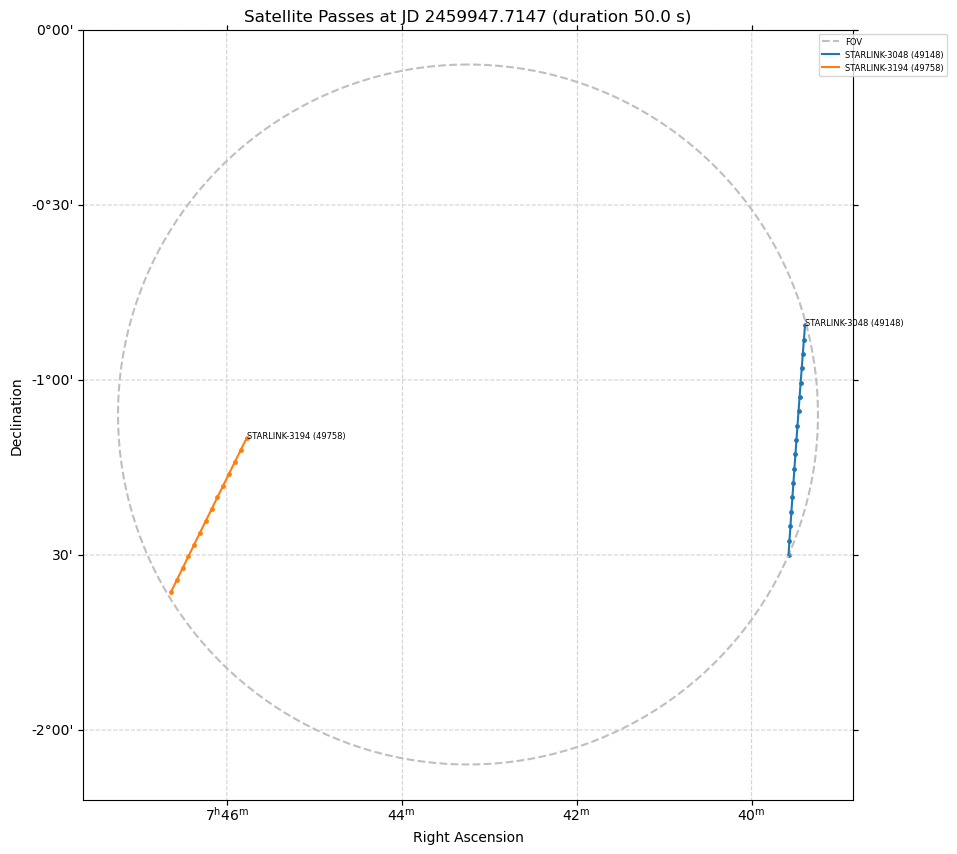

In [136]:
plot_satellites_in_exposure(1161606)


Consultando SatChecker con la siguiente URL:
https://dev.satchecker.cps.iau.noirlab.edu/fov/satellite-passes/?latitude=-30.1661&longitude=70.8149&elevation=2215&start_time_jd=2459642.554146692&duration=100.0&ra=158.21890416666665&dec=-58.679386944444445&fov_radius=1.0&group_by=satellite
Satélites encontrados: ['STARLINK-1700 (46549)', 'STARLINK-2344 (47885)']

EXPNUM: 1085358
DATE-OBS: 2022-03-04 01:17:58.27419 | Duración: 100.0 s
RA: 158.219 deg | DEC: -58.679 deg | FOV: 1.0°
2 satélites con nombre 'STARLINK' encontrados.



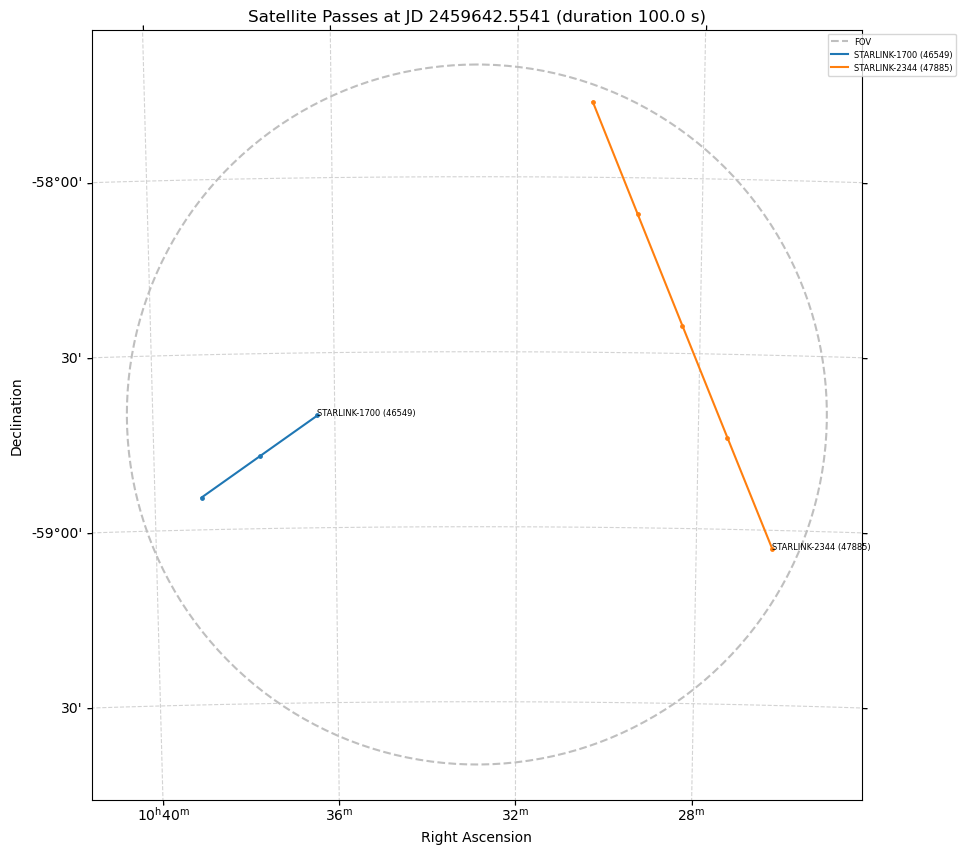

In [137]:
plot_satellites_in_exposure(1085358)

In [24]:
plot_satellites_in_exposure(1103448)


Consultando SatChecker con la siguiente URL:
https://dev.satchecker.cps.iau.noirlab.edu/fov/satellite-passes/?latitude=-30.1661&longitude=70.8149&elevation=2215&start_time_jd=2459739.911116933&duration=50.0&ra=22.748879166666665&dec=-14.293888055555556&fov_radius=1.0&group_by=satellite
Satélites encontrados: []

EXPNUM: 1103448
DATE-OBS: 2022-06-09 09:52:00.503005 | Duración: 50.0 s
RA: 22.749 deg | DEC: -14.294 deg | FOV: 1.0°
0 satélites con nombre 'STARLINK' encontrados.

No se encontraron satélites para graficar.


In [26]:
find_satellites_in_decam_exp(1103448)


Consultando SatChecker con la siguiente URL:
https://dev.satchecker.cps.iau.noirlab.edu/fov/satellite-passes/?latitude=-30.1661&longitude=70.8149&elevation=2215&start_time_jd=2459739.911116933&duration=50.0&ra=22.748879166666665&dec=-14.293888055555556&fov_radius=1.0&group_by=satellite
Satélites encontrados: []

EXPNUM: 1103448
DATE-OBS: 2022-06-09 09:52:00.503005 | Duración: 50.0 s
RA: 22.749 deg | DEC: -14.294 deg | FOV: 1.0°
0 satélites con nombre 'STARLINK' encontrados.



{}

### Function but with all the satellites

In [34]:
def run_satchecker_fov_query(latitude, longitude, elevation, duration, start_time_jd, fov_radius, ra, dec):
    """Consulta SatChecker para satélites en el campo de visión (fov)."""
  
    url = (
        f"https://dev.satchecker.cps.iau.noirlab.edu/fov/satellite-passes/?"
        f"latitude={latitude}&longitude={longitude}&elevation={elevation}&"
        f"start_time_jd={start_time_jd}&duration={duration}&ra={ra}&dec={dec}&"
        f"fov_radius={fov_radius}&group_by=satellite"
    )

    print(f"\nConsultando SatChecker con la siguiente URL:\n{url}")

    try:
        response = requests.get(url, timeout=60)
        response.raise_for_status()
        data = response.json()
    except Exception as e:
        print("Error al consultar el API:", e)
        return {}

    if 'data' not in data or 'satellites' not in data['data']:
        print("Respuesta sin datos de satélites.")
        return {}

    sats = {
        k: [[p['ra'], p['dec'], p['julian_date']] for p in v['positions']]
        for k, v in data['data']['satellites'].items()
    }

    print(f"Satélites encontrados: {list(sats.keys())}")
    return sats


In [35]:
def find_satellites_in_decam_exp(EXPNUM, fov=1, verbose=True):
    """Dada una exposición DECam (EXPNUM), devuelve todos los satélites detectados en el FOV."""
    if EXPNUM not in telemetry1['EXPNUM'].values:
        print(f"EXPNUM {EXPNUM} no encontrado.")
        return {}

    row = telemetry1[telemetry1['EXPNUM'] == EXPNUM].iloc[0]

    latitude = row['OBS-LAT']
    longitude = row['OBS-LONG']
    elevation = row['OBS-ELEV']
    duration = max(float(row['EXPTIME']), 1)
    start_time_jd = Time(row['DATE-OBS']).jd

    try:
        ra = Angle(row['RA'], unit='hourangle').degree if isinstance(row['RA'], str) else float(row['RA'])
    except:
        ra = float(row['RA'])

    try:
        dec = Angle(row['DEC'], unit='deg').degree if isinstance(row['DEC'], str) else float(row['DEC'])
    except:
        dec = float(row['DEC'])

    duration= duration*3
    start_time_jd = (start_time_jd*u.day - duration*u.s).value
    sats = run_satchecker_fov_query(latitude, longitude, elevation, duration, start_time_jd, fov, ra, dec)
    
    

    if verbose:
        print(f"\nEXPNUM: {EXPNUM}")
        print(f"DATE-OBS: {row['DATE-OBS']} | Duración: {duration:.1f} s")
        print(f"RA: {ra:.3f} deg | DEC: {dec:.3f} deg | FOV: {fov}°")
        print(f"{len(sats)} satélites encontrados.\n")

    return sats


In [36]:
def plot_satellites_in_exposure(EXPNUM, fov_radius=1):
    """Grafica todos los satélites detectados en una exposición DECam."""
    sats = find_satellites_in_decam_exp(EXPNUM, fov=fov_radius, verbose=True)

    if not sats:
        print("No se encontraron satélites para graficar.")
        return

    row = telemetry1[telemetry1['EXPNUM'] == EXPNUM].iloc[0]

    coord = SkyCoord(
        ra=row['RA'], dec=row['DEC'], unit=(u.hourangle, u.deg)
    ) if ':' in str(row['RA']) else SkyCoord(
        ra=float(row['RA'])*u.deg, dec=float(row['DEC'])*u.deg
    )

    ra_center = coord.ra.deg
    dec_center = coord.dec.deg
    duration = float(row['EXPTIME'])
    start_time_jd = Time(row['DATE-OBS']).jd
    duration= duration*3
    start_time_jd = (start_time_jd*u.day - duration*u.s).value
    
    
    # WCS
    wcs = WCS(naxis=2)
    wcs.wcs.crpix = [0, 0]
    wcs.wcs.crval = [ra_center, dec_center]
    wcs.wcs.cdelt = [0.1, 0.1]
    wcs.wcs.ctype = ['RA---TAN', 'DEC--TAN']

    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(1, 1, 1, projection=wcs)

    # FOV
    center = SkyCoord(ra=ra_center * u.deg, dec=dec_center * u.deg, frame='icrs')
    angles = np.linspace(0, 360, 360) * u.deg
    circle = center.directional_offset_by(angles, fov_radius * u.deg)
    ax.plot(circle.ra.deg, circle.dec.deg, c='0.75', ls='--', label='FOV', transform=ax.get_transform('world'))

    # Satélites
    for sat_name, path in sats.items():
        ra = [p[0] for p in path]
        dec = [p[1] for p in path]

        coords = SkyCoord(ra=ra * u.deg, dec=dec * u.deg)
        ax.plot(coords.ra.deg, coords.dec.deg, transform=ax.get_transform('world'), label=sat_name)
        ax.scatter(coords.ra.deg, coords.dec.deg, transform=ax.get_transform('world'), s=6)

        # Etiqueta con el nombre
        idx = 0 if coords.ra.deg[0] < coords.ra.deg[-1] else -1
        ax.text(coords.ra.deg[idx], coords.dec.deg[idx], sat_name, transform=ax.get_transform('world'), fontsize=6)

    ax.set_aspect('equal')
    ax.legend(bbox_to_anchor=(0.95, 1), loc='upper left', fontsize=6)
    ax.set_xlabel('Right Ascension')
    ax.set_ylabel('Declination')
    ax.set_title(f'Satellite Passes for {EXPNUM} at JD {start_time_jd:.4f} (duration {duration:.1f} s)')
    ax.invert_xaxis()
    ax.grid(True, linestyle='--', color='lightgray')

    plt.draw()



Consultando SatChecker con la siguiente URL:
https://dev.satchecker.cps.iau.noirlab.edu/fov/satellite-passes/?latitude=-30.1661&longitude=70.8149&elevation=2215&start_time_jd=2459893.736285483&duration=270.0&ra=48.45965833333333&dec=-14.602528055555554&fov_radius=1&group_by=satellite
Satélites encontrados: ['CELESTIS 21/VARISAT 1C (52766)', 'COSMOS 1759 (16798)', 'COSMOS 796 (8612)', 'FOSSASAT2E11 (52750)', 'GLOBALSTAR M071 (31576)', 'OBJECT V (52751)', 'ONEWEB-0138 (47284)', 'ONEWEB-0317 (49103)', 'PLANETUM1 (52738)', 'SL-14 R/B (20671)', 'STARLINK-1282 (45409)', 'STARLINK-1350 (45535)', 'STARLINK-1549 (46074)', 'STARLINK-1560 (46036)', 'STARLINK-2275 (48600)', 'STARLINK-2537 (48301)', 'STARLINK-2646 (48642)', 'STARLINK-2648 (48679)', 'STARLINK-2734 (48657)', 'STARLINK-3688 (52310)', 'STARLINK-3722 (52089)', 'STARLINK-3765 (52295)', 'STARLINK-3791 (52269)', 'STARLINK-3930 (52568)', 'STARLINK-3933 (52538)', 'STARLINK-3955 (52561)', 'STARLINK-4254 (52998)', 'STARLINK-4296 (52995)', 'ST

<IPython.core.display.Javascript object>


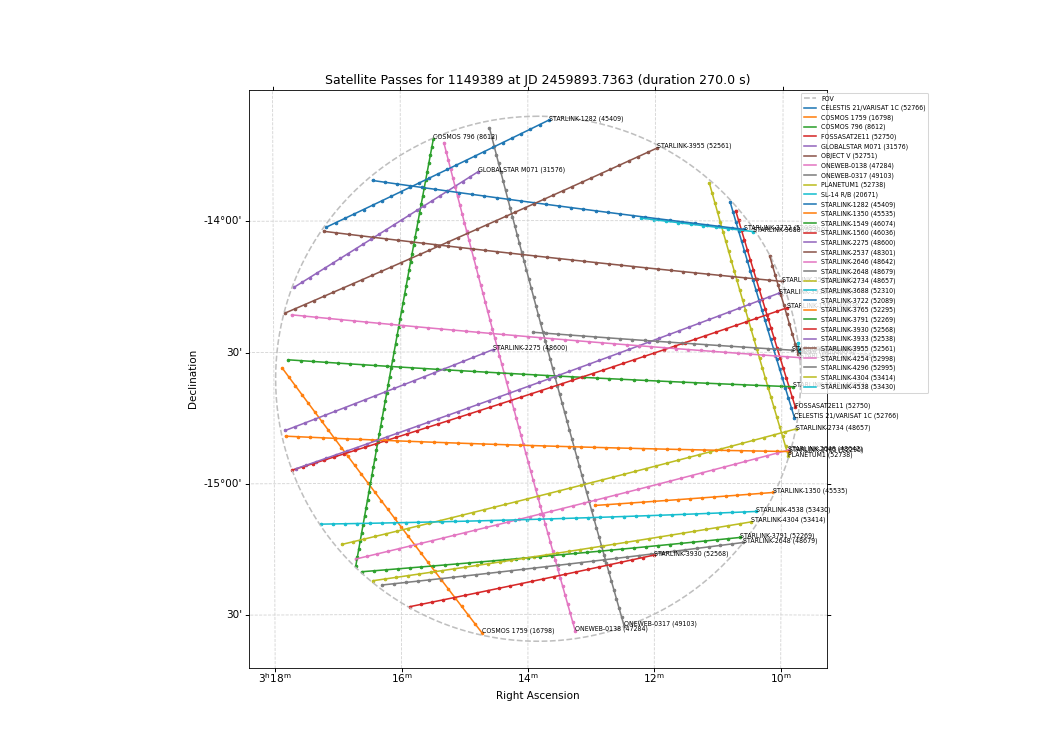

In [37]:
plot_satellites_in_exposure(1103448)